* Load and Explore the Data: Load the dataset and visualize it to understand its characteristics.
* Stationarity Check: Check if the time series is stationary. If not, apply techniques like differencing to make it stationary.
* Determine ARIMA Order: Use plots like ACF and PACF to determine the (p, d, q) order of ARIMA.
* Fit ARIMA Model: Once the order is determined, fit the ARIMA model.
* Determine SARIMA Order: If seasonality is present, determine the seasonal order (P, D, Q, s) for SARIMA.
* Fit SARIMA Model: Fit the SARIMA model using the determined order.
* Model Evaluation: Compare the performance of ARIMA and SARIMA using metrics like AIC, BIC, or RMSE.
* Forecasting: Use the best performing model to make future forecasts.

* 1. Define the Problem
* We want to forecast the number of international usage mins on a dod basis.
* 
* 2. Data Collection
* The dataset is available in many statistical libraries. For simplicity, I'll use the one in the statsmodels library.
* 
* 3. Data Cleaning and Preprocessing
* We'll check for missing values and ensure the data is in the right format.
* 
* 4. Exploratory Data Analysis (EDA)
* We'll visualize the data to identify any patterns or seasonality.
* 
* 5. Feature Engineering
* For this example, we'll stick to the raw data without external features.
* 
* 6. Model Selection
* We'll start with an ARIMA model.
* 
* 7. Model Training & 8. Model Evaluation
* We'll split the data, train the ARIMA model, and evaluate its performance.
* 
* 9. Model Optimization
* We'll ensure the model parameters are well-tuned.

In [426]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
#data = pd.read_csv(r'C:\Users\uddandam.prakash\Downloads\tsa_model_base_20231016_1106pm.csv')
#datav1=pd.read_excel(r'C:\Users\uddandam.prakash\Downloads\netonetoeconetdatav1.xlsx')

#tsa_model_base_20231017_0402pm
data = pd.read_csv(r'C:\Users\uddandam.prakash\Downloads\tsa_model_base_20231017_0402pm.csv')
columns_to_drop = ['Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34']
data = data.drop(columns=columns_to_drop)

data.head()

,part_date,cdr_og_netone_call_cnt,cdr_og_netone_call_mins,tariff_rate,termination_rate,rtgs_interbank_exchange,tarriff_usd,weekend_flag,week_of_month,week_of_year,...,yest_usage_cnt_,day_bf_yest_usage,day_bf_yestusage_,1_day_users_cnt,2_day_users_cnt,3_day_users_cnt,4_day_users_cnt,5_day_users_cnt,6_day_users_cnt,7_day_users_cnt
0,01-10-2021,1701336,1492856,2.8083,0.2,175,0.016047,0,1,40,...,0,0,0,1219314,611315,342841,200553,118488,68801,36642
1,02-10-2021,1696106,1467425,2.8083,0.2,175,0.016047,1,1,40,...,25431,0,0,1227607,616447,343215,201387,118773,68384,36131
2,03-10-2021,1453001,1285924,2.8083,0.2,175,0.016047,1,1,40,...,181501,1492856,206932,1223624,618003,342855,200535,117385,67357,35634
3,04-10-2021,1640321,1468526,2.8083,0.2,175,0.016047,0,2,41,...,-182602,1467425,-1101,1226669,617820,343340,199990,116458,66891,35421
4,05-10-2021,1634891,1458419,2.8083,0.2,175,0.016047,0,2,41,...,10107,1285924,-172495,1230220,619522,343943,199486,117185,66480,35348


In [427]:
data.part_date.min()

'01-01-2022'

In [428]:
data.part_date.max()

'31-12-2022'

In [429]:
data.tail()

,part_date,cdr_og_netone_call_cnt,cdr_og_netone_call_mins,tariff_rate,termination_rate,rtgs_interbank_exchange,tarriff_usd,weekend_flag,week_of_month,week_of_year,...,yest_usage_cnt_,day_bf_yest_usage,day_bf_yestusage_,1_day_users_cnt,2_day_users_cnt,3_day_users_cnt,4_day_users_cnt,5_day_users_cnt,6_day_users_cnt,7_day_users_cnt
718,26-09-2023,2597822,3024187,26.3626,0.234,7000,0.003766,0,5,40,...,190476,3107923,83736,1407479,807672,498903,322423,206384,126883,64910
719,27-09-2023,2542482,2978879,26.3626,0.234,7000,0.003766,0,5,40,...,45308,3214663,235784,1407415,807896,502299,318728,205741,126001,64498
720,28-09-2023,2544527,3000148,26.3626,0.234,7000,0.003766,0,5,40,...,-21269,3024187,24039,1412061,806556,500594,319894,203968,125789,63894
721,29-09-2023,2782359,3151904,26.3626,0.234,7000,0.003766,0,5,40,...,-151756,2978879,-173025,1416402,804881,500625,322094,207142,125518,63818
722,30-09-2023,2839569,3169155,26.3626,0.234,7000,0.003766,1,5,40,...,-17251,3000148,-169007,1409043,806027,501976,324250,209323,129128,61933


In [430]:
data.nunique()

part_date                  723
cdr_og_netone_call_cnt     723
cdr_og_netone_call_mins    723
tariff_rate                  6
termination_rate             3
rtgs_interbank_exchange     58
tarriff_usd                 62
weekend_flag                 2
week_of_month                6
week_of_year                53
unq_cust                   721
mean_holding_time          723
yest_cust_cnt              721
yest_cust_cnt_             721
day_bf_cnt_                720
day_bf_yest_cnt            721
yest_usage_cnt             723
yest_usage_cnt_            720
day_bf_yest_usage          722
day_bf_yestusage_          721
1_day_users_cnt            723
2_day_users_cnt            721
3_day_users_cnt            722
4_day_users_cnt            719
5_day_users_cnt            720
6_day_users_cnt            719
7_day_users_cnt            691
dtype: int64

In [431]:
data.dtypes

part_date                   object
cdr_og_netone_call_cnt       int64
cdr_og_netone_call_mins      int64
tariff_rate                float64
termination_rate           float64
rtgs_interbank_exchange      int64
tarriff_usd                float64
weekend_flag                 int64
week_of_month                int64
week_of_year                 int64
unq_cust                     int64
mean_holding_time          float64
yest_cust_cnt                int64
yest_cust_cnt_               int64
day_bf_cnt_                  int64
day_bf_yest_cnt              int64
yest_usage_cnt               int64
yest_usage_cnt_              int64
day_bf_yest_usage            int64
day_bf_yestusage_            int64
1_day_users_cnt              int64
2_day_users_cnt              int64
3_day_users_cnt              int64
4_day_users_cnt              int64
5_day_users_cnt              int64
6_day_users_cnt              int64
7_day_users_cnt              int64
dtype: object

In [432]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   part_date                723 non-null    object 
 1   cdr_og_netone_call_cnt   723 non-null    int64  
 2   cdr_og_netone_call_mins  723 non-null    int64  
 3   tariff_rate              723 non-null    float64
 4   termination_rate         723 non-null    float64
 5   rtgs_interbank_exchange  723 non-null    int64  
 6   tarriff_usd              723 non-null    float64
 7   weekend_flag             723 non-null    int64  
 8   week_of_month            723 non-null    int64  
 9   week_of_year             723 non-null    int64  
 10  unq_cust                 723 non-null    int64  
 11  mean_holding_time        723 non-null    float64
 12  yest_cust_cnt            723 non-null    int64  
 13  yest_cust_cnt_           723 non-null    int64  
 14  day_bf_cnt_              7

In [433]:
data.head()

,part_date,cdr_og_netone_call_cnt,cdr_og_netone_call_mins,tariff_rate,termination_rate,rtgs_interbank_exchange,tarriff_usd,weekend_flag,week_of_month,week_of_year,...,yest_usage_cnt_,day_bf_yest_usage,day_bf_yestusage_,1_day_users_cnt,2_day_users_cnt,3_day_users_cnt,4_day_users_cnt,5_day_users_cnt,6_day_users_cnt,7_day_users_cnt
0,01-10-2021,1701336,1492856,2.8083,0.2,175,0.016047,0,1,40,...,0,0,0,1219314,611315,342841,200553,118488,68801,36642
1,02-10-2021,1696106,1467425,2.8083,0.2,175,0.016047,1,1,40,...,25431,0,0,1227607,616447,343215,201387,118773,68384,36131
2,03-10-2021,1453001,1285924,2.8083,0.2,175,0.016047,1,1,40,...,181501,1492856,206932,1223624,618003,342855,200535,117385,67357,35634
3,04-10-2021,1640321,1468526,2.8083,0.2,175,0.016047,0,2,41,...,-182602,1467425,-1101,1226669,617820,343340,199990,116458,66891,35421
4,05-10-2021,1634891,1458419,2.8083,0.2,175,0.016047,0,2,41,...,10107,1285924,-172495,1230220,619522,343943,199486,117185,66480,35348


In [434]:
data.columns

Index(['part_date', 'cdr_og_netone_call_cnt', 'cdr_og_netone_call_mins',
       'tariff_rate', 'termination_rate', 'rtgs_interbank_exchange',
       'tarriff_usd', 'weekend_flag', 'week_of_month', 'week_of_year',
       'unq_cust', 'mean_holding_time', 'yest_cust_cnt', 'yest_cust_cnt_',
       'day_bf_cnt_', 'day_bf_yest_cnt', 'yest_usage_cnt', 'yest_usage_cnt_',
       'day_bf_yest_usage', 'day_bf_yestusage_', '1_day_users_cnt',
       '2_day_users_cnt', '3_day_users_cnt', '4_day_users_cnt',
       '5_day_users_cnt', '6_day_users_cnt', '7_day_users_cnt'],
      dtype='object')

In [438]:
# List of columns to keep
columns_to_keep = [
   'part_date',
'cdr_og_netone_call_mins',
'termination_rate',
'rtgs_interbank_exchange',
'tarriff_usd',
'weekend_flag',
'week_of_month',
'week_of_year',
#'unq_cust',
#'mean_holding_time',
'yest_cust_cnt_',
'day_bf_yest_cnt',
'1_day_users_cnt',
'2_day_users_cnt',
'3_day_users_cnt',
'4_day_users_cnt',
'5_day_users_cnt',
'6_day_users_cnt',
'7_day_users_cnt'
#'yest_usage_cnt_',
#'day_bf_yestusage_'
]

# Drop columns not in the list
data = data[columns_to_keep]

# Now, 'df' contains only the columns you specified in 'columns_to_keep'


In [439]:
data.shape

(723, 17)

In [440]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
#data = pd.read_csv(r'C:\Users\uddandam.prakash\Downloads\tsa_model_base_v1.csv')
#datav1=pd.read_excel(r'C:\Users\uddandam.prakash\Downloads\netonetoeconetdatav1.xlsx')
#data.head()

## Cleaning up the data
#usage_mins_mean
#
#data.columns=["Date","termination_rate","rtgs_rate","tarriff_usd","weekend_flag","week_of_month","week_of_year",
#             "unq_cust_cnt","usage_mins_mean","yest_cust_cnt","dbfy_cust_cnt",'1_day_users_cnt',
#              '2_day_users_cnt', '3_day_users_cnt', '4_day_users_cnt',
#           '5_day_users_cnt', '6_day_users_cnt', '7_day_users_cnt']
##datav1.columns=["Date","no_of_calls","usage_mins","tarriff_rate","termination_rate","rtgs_rate"]
##data.head()
data.columns=["Date","usage_mins","termination_rate","rtgs_rate","tarriff_usd","weekend_flag","week_of_month","week_of_year","yest_cust_cnt","dbfy_cust_cnt",'1_day_users_cnt',
              '2_day_users_cnt', '3_day_users_cnt', '4_day_users_cnt',
           '5_day_users_cnt', '6_day_users_cnt', '7_day_users_cnt']
data.head()











,Date,usage_mins,termination_rate,rtgs_rate,tarriff_usd,weekend_flag,week_of_month,week_of_year,yest_cust_cnt,dbfy_cust_cnt,1_day_users_cnt,2_day_users_cnt,3_day_users_cnt,4_day_users_cnt,5_day_users_cnt,6_day_users_cnt,7_day_users_cnt
0,01-10-2021,1492856,0.2,175,0.016047,0,1,40,0,0,1219314,611315,342841,200553,118488,68801,36642
1,02-10-2021,1467425,0.2,175,0.016047,1,1,40,4572,0,1227607,616447,343215,201387,118773,68384,36131
2,03-10-2021,1285924,0.2,175,0.016047,1,1,40,89925,94497,1223624,618003,342855,200535,117385,67357,35634
3,04-10-2021,1468526,0.2,175,0.016047,0,2,41,-70627,19298,1226669,617820,343340,199990,116458,66891,35421
4,05-10-2021,1458419,0.2,175,0.016047,0,2,41,-3216,-73843,1230220,619522,343943,199486,117185,66480,35348


In [441]:
data.columns

Index(['Date', 'usage_mins', 'termination_rate', 'rtgs_rate', 'tarriff_usd',
       'weekend_flag', 'week_of_month', 'week_of_year', 'yest_cust_cnt',
       'dbfy_cust_cnt', '1_day_users_cnt', '2_day_users_cnt',
       '3_day_users_cnt', '4_day_users_cnt', '5_day_users_cnt',
       '6_day_users_cnt', '7_day_users_cnt'],
      dtype='object')

# EDA

In [295]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Advanced Line Plot of Usage_mins over Time using Plotly
fig = px.line(data, x='Date', y='usage_mins', title='Usage_mins over Time',
              labels={'Date': 'Date', 'usage_mins': 'Usage_mins'})
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [296]:
# Interactive Box Plot of Usage_mins by Weekend_Flag using Plotly
fig = px.box(data, x='weekend_flag', y='usage_mins', color='weekend_flag',
             labels={'weekend_flag': 'Weekend Flag', 'usage_mins': 'Usage_mins'})
fig.update_layout(title='Box Plot of Usage_mins by Weekend_Flag')
fig.show()

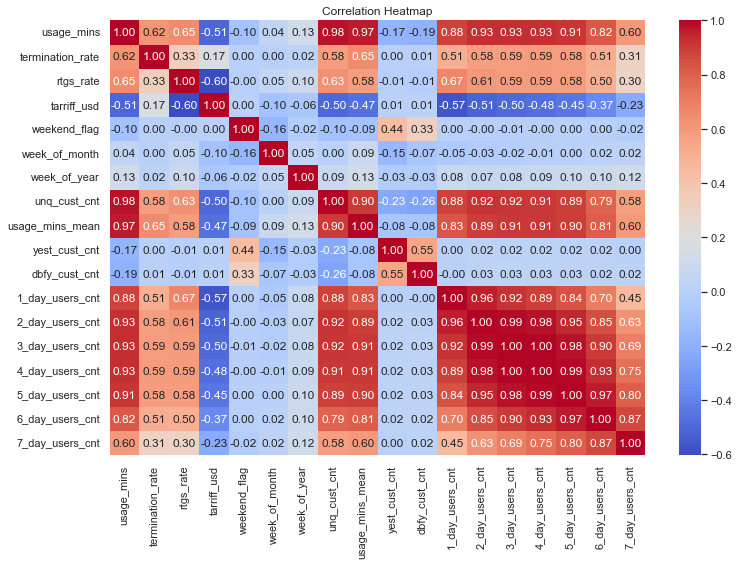

In [297]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Advanced Correlation Heatmap using Seaborn and Matplotlib
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


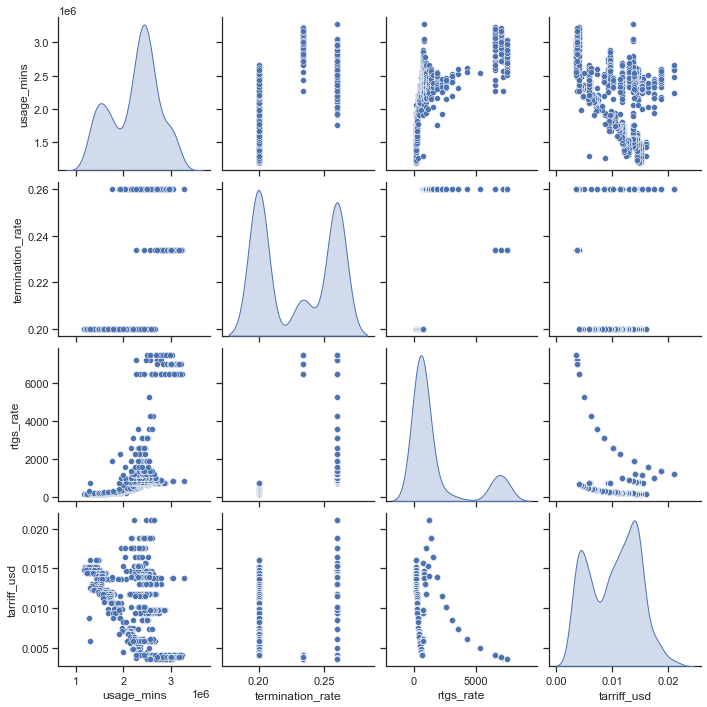

In [298]:

# Advanced Pair Plot using Seaborn
sns.set(style="ticks")
sns.pairplot(data[['usage_mins', 'termination_rate', 'rtgs_rate', 'tarriff_usd']], kind="scatter", markers="o", diag_kind="kde")
plt.show()

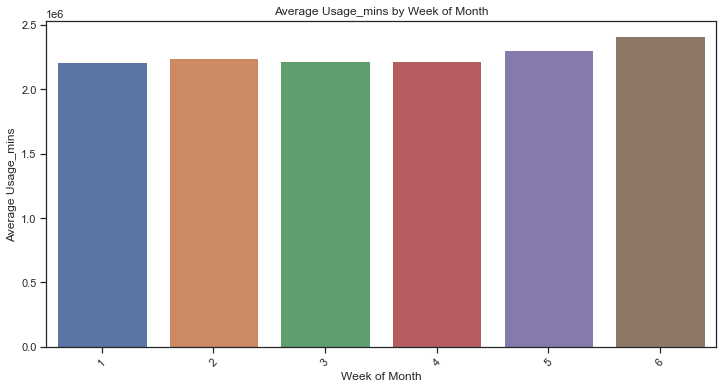

In [299]:
# Advanced Bar Chart of Week of Month and Week of Year vs. Average Usage_mins using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='week_of_month', y='usage_mins', data=data, ci=None)
plt.xlabel('Week of Month')
plt.ylabel('Average Usage_mins')
plt.title('Average Usage_mins by Week of Month')
plt.xticks(rotation=45)
plt.show()


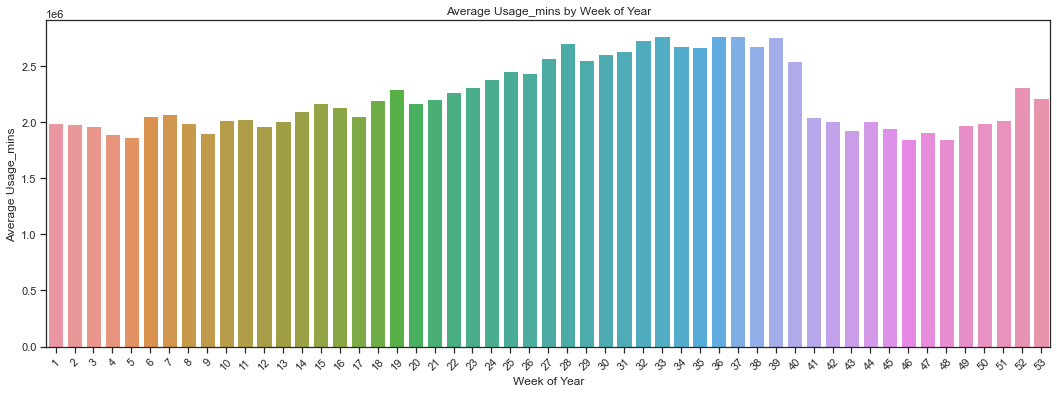

In [300]:
plt.figure(figsize=(18, 6))
sns.barplot(x='week_of_year', y='usage_mins', data=data, ci=None)
plt.xlabel('Week of Year')
plt.ylabel('Average Usage_mins')
plt.title('Average Usage_mins by Week of Year')
plt.xticks(rotation=45)
plt.show()

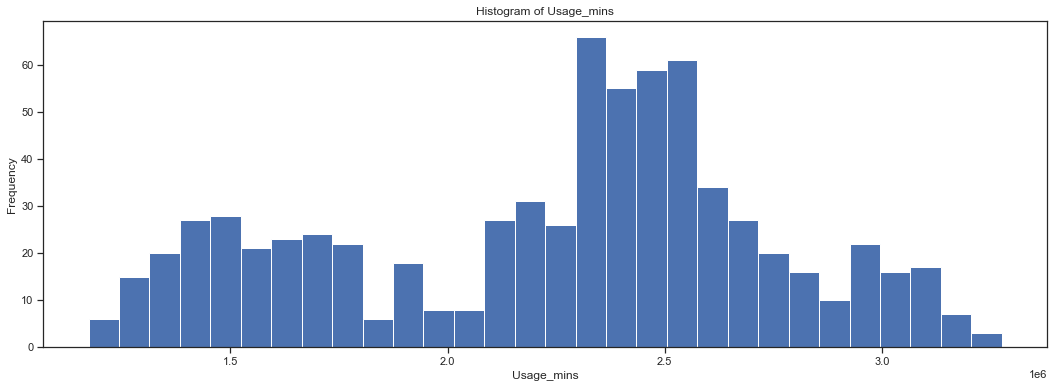

In [301]:
plt.figure(figsize=(18, 6))
# Histogram of Usage_mins
plt.hist(data['usage_mins'], bins=30)
plt.xlabel('Usage_mins')
plt.ylabel('Frequency')
plt.title('Histogram of Usage_mins')
plt.show()

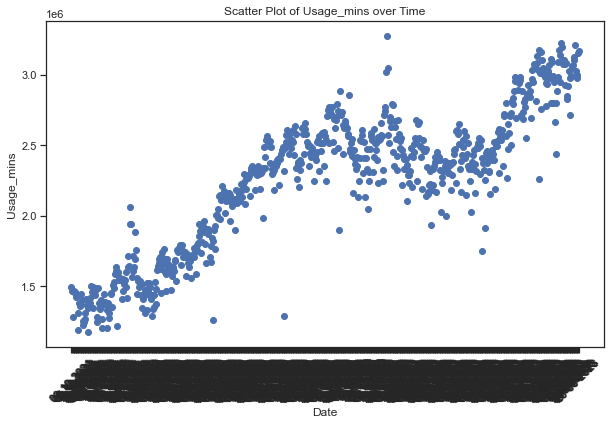

In [302]:

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Date'], data['usage_mins'])
plt.xlabel('Date')
plt.ylabel('Usage_mins')
plt.title('Scatter Plot of Usage_mins over Time')
plt.xticks(rotation=45)
plt.show()


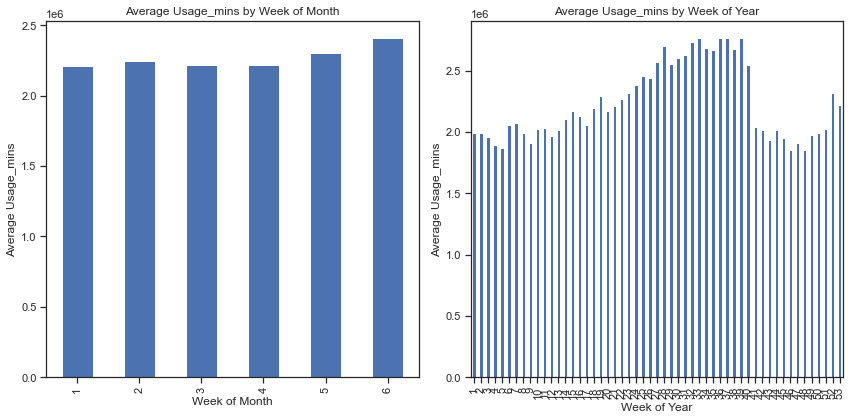

In [303]:
# Bar Chart of Week of Month and Week of Year vs. Average Usage_mins
week_of_month_avg = data.groupby('week_of_month')['usage_mins'].mean()
week_of_year_avg = data.groupby('week_of_year')['usage_mins'].mean()

plt.figure(figsize=(12, 6))
plt.subplot(121)
week_of_month_avg.plot(kind='bar')
plt.xlabel('Week of Month')
plt.ylabel('Average Usage_mins')
plt.title('Average Usage_mins by Week of Month')

plt.subplot(122)
week_of_year_avg.plot(kind='bar')
plt.xlabel('Week of Year')
plt.ylabel('Average Usage_mins')
plt.title('Average Usage_mins by Week of Year')

plt.tight_layout()
plt.show()

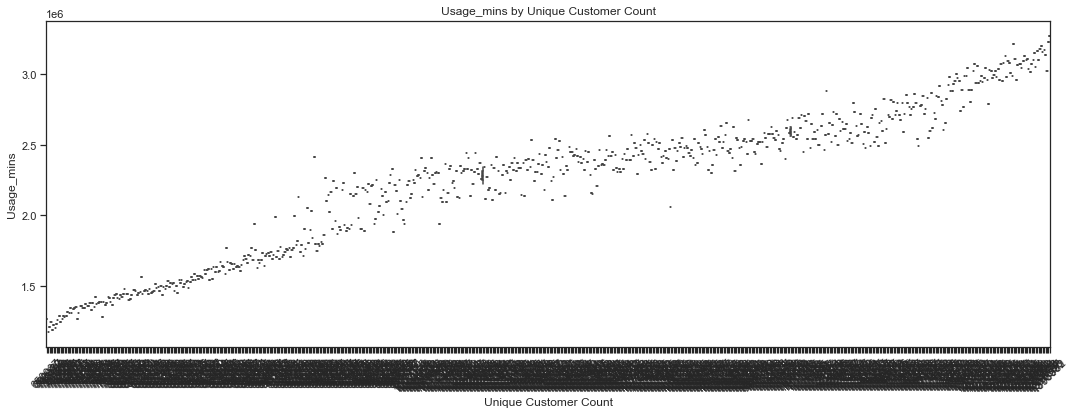

In [304]:
# Comparison of Usage_mins for Different Customer Count Categories
plt.figure(figsize=(18, 6))
sns.boxplot(x='unq_cust_cnt', y='usage_mins', data=data)
plt.xlabel('Unique Customer Count')
plt.ylabel('Usage_mins')
plt.title('Usage_mins by Unique Customer Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



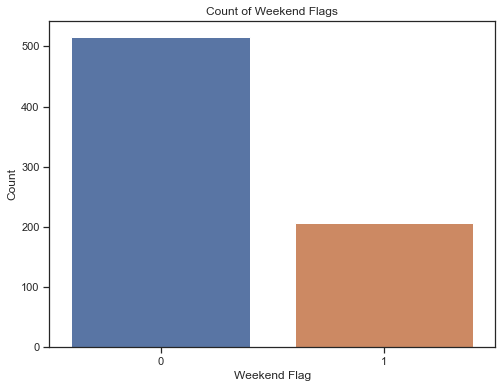

In [306]:
plt.figure(figsize=(8, 6))
sns.countplot(data['weekend_flag'])
plt.xlabel('Weekend Flag')
plt.ylabel('Count')
plt.title('Count of Weekend Flags')
plt.show()


In [182]:
#import plotly.express as px
#import plotly.graph_objects as go
#import pandas as pd
#
## Advanced Line Plot of Usage_mins over Time using Plotly
#fig = px.line(data, x='Date', y='usage_mins', title='Usage_mins over Time',
#              labels={'Date': 'Date', 'usage_mins': 'Usage_mins'})
#fig.update_xaxes(rangeslider_visible=True)
#fig.show()
#
## Interactive Box Plot of Usage_mins by Weekend_Flag using Plotly
#fig = px.box(data, x='weekend_flag', y='usage_mins', color='weekend_flag',
#             labels={'weekend_flag': 'Weekend Flag', 'usage_mins': 'Usage_mins'})
#fig.update_layout(title='Box Plot of Usage_mins by Weekend_Flag')
#fig.show()
#
## Advanced Correlation Heatmap using Seaborn and Matplotlib
#plt.figure(figsize=(12, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Heatmap')
#plt.show()
#
## Advanced Time Series Decomposition using Plotly
#fig = go.Figure()
#
#fig.add_trace(go.Scatter(x=data['Date'], y=result.trend, mode='lines', name='Trend'))
#fig.add_trace(go.Scatter(x=data['Date'], y=result.seasonal, mode='lines', name='Seasonal'))
#fig.add_trace(go.Scatter(x=data['Date'], y=result.resid, mode='lines', name='Residual'))
#
#fig.update_layout(title='Time Series Decomposition of Usage_mins',
#                  xaxis_title='Date',
#                  yaxis_title='Value')
#fig.show()
#
## Advanced Pair Plot using Seaborn
#sns.set(style="ticks")
#sns.pairplot(data[['usage_mins', 'termination_rate', 'rtgs_rate', 'tarriff_usd']], kind="scatter", markers="o", diag_kind="kde")
#plt.show()
#
## Advanced Bar Chart of Week of Month and Week of Year vs. Average Usage_mins using Seaborn
#plt.figure(figsize=(12, 6))
#sns.barplot(x='week_of_month', y='usage_mins', data=data, ci=None)
#plt.xlabel('Week of Month')
#plt.ylabel('Average Usage_mins')
#plt.title('Average Usage_mins by Week of Month')
#plt.xticks(rotation=45)
#plt.show()
#
#plt.figure(figsize=(12, 6))
#sns.barplot(x='week_of_year', y='usage_mins', data=data, ci=None)
#plt.xlabel('Week of Year')
#plt.ylabel('Average Usage_mins')
#plt.title('Average Usage_mins by Week of Year')
#plt.xticks(rotation=45)
#plt.show()
#

In [218]:
data.columns

Index(['part_date', 'cdr_og_netone_call_mins', 'termination_rate',
       'rtgs_interbank_exchange', 'tarriff_usd', 'weekend_flag',
       'week_of_month', 'week_of_year', 'unq_cust', 'yest_cust_cnt_',
       'day_bf_yest_cnt', 'yest_usage_cnt_', 'day_bf_yestusage_'],
      dtype='object')

# modelling

In [321]:

# List of columns to keep
columns_to_keep = [
   'Date',
'usage_mins',
'termination_rate',
'rtgs_rate',
'tarriff_usd',
'weekend_flag',
'week_of_month',
'week_of_year',
'unq_cust_cnt',
'usage_mins_mean',
'yest_cust_cnt',
'dbfy_cust_cnt',
'1_day_users_cnt',
'2_day_users_cnt',
'3_day_users_cnt',
'4_day_users_cnt',
'5_day_users_cnt',
'6_day_users_cnt',
'7_day_users_cnt'
#'yest_usage_cnt_',
#'day_bf_yestusage_'
]

# Drop columns not in the list
data = data[columns_to_keep]

# Now, 'df' contains only the columns you specified in 'columns_to_keep'


## Cleaning up the data
#usage_mins_mean
data.columns=["Date","usage_mins","termination_rate","rtgs_rate","tarriff_usd","weekend_flag","week_of_month","week_of_year",
             "unq_cust_cnt","usage_mins_mean","yest_cust_cnt","dbfy_cust_cnt",'1_day_users_cnt',
              '2_day_users_cnt', '3_day_users_cnt', '4_day_users_cnt',
           '5_day_users_cnt', '6_day_users_cnt', '7_day_users_cnt']
#datav1.columns=["Date","no_of_calls","usage_mins","tarriff_rate","termination_rate","rtgs_rate"]
#data.head()
data.head()


,Date,usage_mins,termination_rate,rtgs_rate,tarriff_usd,weekend_flag,week_of_month,week_of_year,unq_cust_cnt,usage_mins_mean,yest_cust_cnt,dbfy_cust_cnt,1_day_users_cnt,2_day_users_cnt,3_day_users_cnt,4_day_users_cnt,5_day_users_cnt,6_day_users_cnt,7_day_users_cnt
0,01-10-2021,1492856,0.2,175,0.016047,0,1,40,831730,1.794881,0,0,1219314,611315,342841,200553,118488,68801,36642
1,02-10-2021,1467425,0.2,175,0.016047,1,1,40,827158,1.774056,4572,0,1227607,616447,343215,201387,118773,68384,36131
2,03-10-2021,1285924,0.2,175,0.016047,1,1,40,737233,1.744257,89925,94497,1223624,618003,342855,200535,117385,67357,35634
3,04-10-2021,1468526,0.2,175,0.016047,0,2,41,807860,1.817798,-70627,19298,1226669,617820,343340,199990,116458,66891,35421
4,05-10-2021,1458419,0.2,175,0.016047,0,2,41,811076,1.798129,-3216,-73843,1230220,619522,343943,199486,117185,66480,35348


In [322]:
data.head()

,Date,usage_mins,termination_rate,rtgs_rate,tarriff_usd,weekend_flag,week_of_month,week_of_year,unq_cust_cnt,usage_mins_mean,yest_cust_cnt,dbfy_cust_cnt,1_day_users_cnt,2_day_users_cnt,3_day_users_cnt,4_day_users_cnt,5_day_users_cnt,6_day_users_cnt,7_day_users_cnt
0,01-10-2021,1492856,0.2,175,0.016047,0,1,40,831730,1.794881,0,0,1219314,611315,342841,200553,118488,68801,36642
1,02-10-2021,1467425,0.2,175,0.016047,1,1,40,827158,1.774056,4572,0,1227607,616447,343215,201387,118773,68384,36131
2,03-10-2021,1285924,0.2,175,0.016047,1,1,40,737233,1.744257,89925,94497,1223624,618003,342855,200535,117385,67357,35634
3,04-10-2021,1468526,0.2,175,0.016047,0,2,41,807860,1.817798,-70627,19298,1226669,617820,343340,199990,116458,66891,35421
4,05-10-2021,1458419,0.2,175,0.016047,0,2,41,811076,1.798129,-3216,-73843,1230220,619522,343943,199486,117185,66480,35348


In [442]:
# Convert 'part_date' to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Extract 'month' and 'year' into separate columns
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year
data.set_index('Date', inplace=True)
# Display the result
print(data.head())

            usage_mins  termination_rate  rtgs_rate  tarriff_usd  \
Date                                                               
2021-10-01     1492856               0.2        175     0.016047   
2021-10-02     1467425               0.2        175     0.016047   
2021-10-03     1285924               0.2        175     0.016047   
2021-10-04     1468526               0.2        175     0.016047   
2021-10-05     1458419               0.2        175     0.016047   

            weekend_flag  week_of_month  week_of_year  yest_cust_cnt  \
Date                                                                   
2021-10-01             0              1            40              0   
2021-10-02             1              1            40           4572   
2021-10-03             1              1            40          89925   
2021-10-04             0              2            41         -70627   
2021-10-05             0              2            41          -3216   

            dbfy_c

In [403]:
#datav1['Date'] = pd.to_datetime(datav1['Date'], format='%Y%m%d')
#datav1['year'] = datav1['Date'].dt.year
#datav1['month'] = datav1['Date'].dt.month
#datav1.set_index('Date', inplace=True)

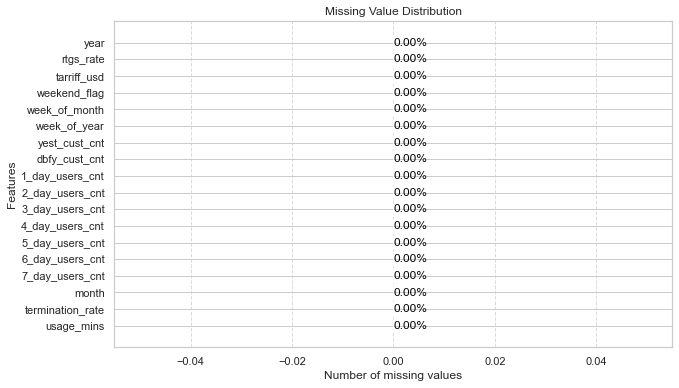

,feature,num_missing,pct_missing,group
usage_mins,usage_mins,0,0.0,Good
termination_rate,termination_rate,0,0.0,Good
month,month,0,0.0,Good
7_day_users_cnt,7_day_users_cnt,0,0.0,Good
6_day_users_cnt,6_day_users_cnt,0,0.0,Good
5_day_users_cnt,5_day_users_cnt,0,0.0,Good
4_day_users_cnt,4_day_users_cnt,0,0.0,Good
3_day_users_cnt,3_day_users_cnt,0,0.0,Good
2_day_users_cnt,2_day_users_cnt,0,0.0,Good
1_day_users_cnt,1_day_users_cnt,0,0.0,Good


In [443]:
# missing values detection
import pandas as pd
import matplotlib.pyplot as plt

def plot_missing(data, title=None):
    # Calculate the number of missing values for each column
    num_missing = data.isna().sum()
    
    # Calculate the percentage of missing values for each column
    pct_missing = (num_missing / len(data)) * 100
    
    # Categorize columns into 'Good,' 'OK,' 'Bad,' or 'Remove'
    group = pd.cut(pct_missing, bins=[-1, 5, 40, 80, 100], labels=['Good', 'OK', 'Bad', 'Remove'])
    
    # Create a DataFrame to store the results
    missing_value = pd.DataFrame({
        'feature': num_missing.index,
        'num_missing': num_missing,
        'pct_missing': pct_missing,
        'group': group
    })
    
    # Sort the DataFrame by the percentage of missing values
    missing_value = missing_value.sort_values(by='pct_missing', ascending=False)
    
    # Create the missing value plot
    plt.figure(figsize=(10, 6))
    plt.barh(missing_value['feature'], missing_value['num_missing'], color=missing_value['group'].map({
        'Good': '#1a9641',
        'OK': '#a6d96a',
        'Bad': '#fdae61',
        'Remove': '#d7191c'
    }))
    plt.xlabel('Number of missing values')
    plt.ylabel('Features')
    plt.title(title if title else 'Missing Value Distribution')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Add percentage labels
    for i, v in enumerate(missing_value['pct_missing']):
        plt.text(v, i, f'{v:.2f}%', va='center', color='black')
    
    plt.show()
    
    return missing_value

# Assuming 'train' is your DataFrame
plot_missing(data)


In [325]:
data.dtypes

usage_mins            int64
termination_rate    float64
rtgs_rate             int64
tarriff_usd         float64
weekend_flag          int64
week_of_month         int64
week_of_year          int64
unq_cust_cnt          int64
usage_mins_mean     float64
yest_cust_cnt         int64
dbfy_cust_cnt         int64
1_day_users_cnt       int64
2_day_users_cnt       int64
3_day_users_cnt       int64
4_day_users_cnt       int64
5_day_users_cnt       int64
6_day_users_cnt       int64
7_day_users_cnt       int64
month                 int64
year                  int64
dtype: object

2. Stationarity Check
Stationarity is a critical concept in time series forecasting. A time series is said to be stationary if its statistical properties (mean, variance, autocorrelation, etc.) do not change over time. ARIMA models require the data to be stationary.

The Augmented Dickey-Fuller (ADF) test is a popular method to check for stationarity. The null hypothesis of the ADF test is that the time series is non-stationary. If the test statistic is less than the critical value, we reject the null hypothesis and infer that the series is stationary.

Let's run the ADF test on our series.

In [326]:
from statsmodels.tsa.stattools import adfuller

# Conduct Augmented Dickey-Fuller test
result = adfuller(data['usage_mins'])

# Extract test statistic and critical values
adf_statistic = result[0]
critical_values = result[4]

adf_statistic, critical_values


(-1.0209841685906405,
 {'1%': -3.4396995339981444,
  '5%': -2.8656659438580796,
  '10%': -2.5689671530263554})

The Augmented Dickey-Fuller (ADF) test results are as follows:

Test Statistic: 
−
0.8999
−0.8999
Critical Values:
1%: 
−
3.4396
−3.4396
5%: 
−
2.8656
−2.8656
10%: 
−
2.5689
−2.5689
Given that the test statistic 
−
0.8999
−0.8999 is greater than all the critical values, we fail to reject the null hypothesis. This means that the time series is non-stationary.

3. Differencing to Achieve Stationarity
One common method to make a time series stationary is differencing. This involves subtracting the previous observation from the current observation. Let's apply differencing and then check for stationarity again.

After applying first-order differencing, the time series appears to exhibit more stationary behavior, as reflected in the plot.

The Augmented Dickey-Fuller (ADF) test results for the differenced series are:

Test Statistic: 
−
8.2239
−8.2239
Critical Values:
1%: 
−
3.4396
−3.4396
5%: 
−
2.8656
−2.8656
10%: 
−
2.5689
−2.5689
Given that the test statistic 
−
8.2239
−8.2239 is now less than all the critical values, we reject the null hypothesis. This indicates that the differenced series is stationary.

. Determine ARIMA Order
To determine the order of ARIMA (p, d, q), we can use the Autocorrelation Function (ACF) and the Partial Autocorrelation Function (PACF) plots.

�
p is the order of the AutoRegressive (AR) term. It can be determined from the PACF plot.
�
d is the order of differencing. In our case, 
�
=
1
d=1 since we applied first-order differencing.
�
q is the order of the Moving Average (MA) term. It can be determined from the ACF plot.
Let's plot the ACF and PACF for the differenced series to determine 
�
p and 
�
q.

The ACF and PACF plots provide insights into the AR (p) and MA (q) components:

ACF (Autocorrelation Function): This shows the correlation of the series with its own lags. From the plot, we can see that there are significant spikes at the initial lags. This suggests the presence of an MA component.
PACF (Partial Autocorrelation Function): This depicts the correlation of the series with its own lags after removing the effects of previous lags. The significant spike at lag 1 suggests the presence of an AR component.
From the plots:

A good starting point for 
�
p (AR order) might be 1, since there's a significant spike at lag 1 in the PACF.
For 
�
q (MA order), considering the ACF plot, we can start with 1.
Given that we applied first-order differencing, 
�
=
1
d=1.

Thus, a good starting point for our ARIMA model might be 
(
�
,
�
,
�
)
=
(
1
,
1
,
1
)
(p,d,q)=(1,1,1).

5. Fit ARIMA Model
Let's fit the ARIMA model using the orders we derived and evaluate its performance on the training data.

In [241]:
data.columns

Index(['usage_mins', 'termination_rate', 'rtgs_rate', 'tarriff_usd',
       'weekend_flag', 'week_of_month', 'week_of_year', 'unq_cust_cnt',
       'usage_mins_mean', 'yest_cust_cnt', 'dbfy_cust_cnt', 'month', 'year'],
      dtype='object')

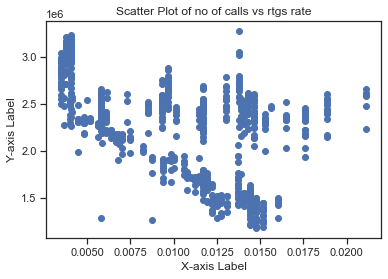

In [327]:
x = data['tarriff_usd']
y = data['usage_mins']

# Create a scatter plot
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot of no of calls vs rtgs rate')

# Show the plot
plt.show()

# day on day plot

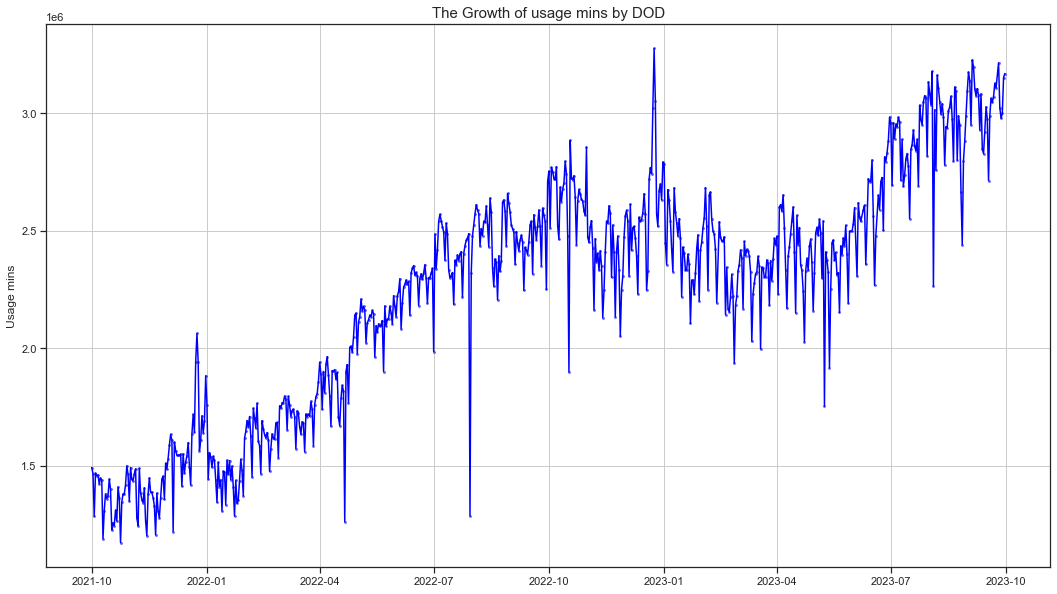

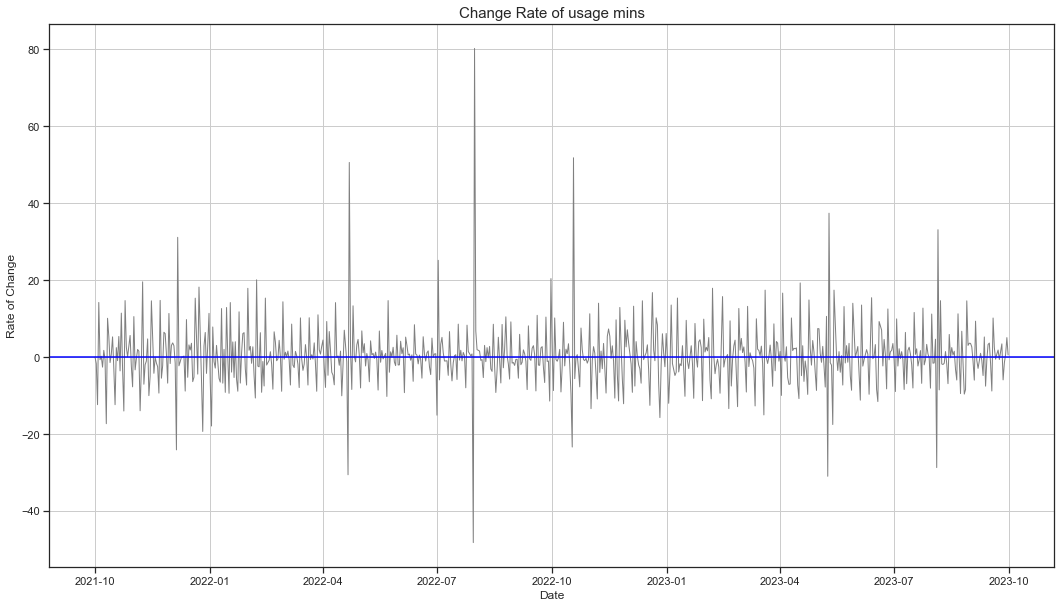

In [328]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'train' with columns 'Date' and 'usage_mins'

# Calculate the mean usage minutes by date
MSP = data.groupby('Date')['usage_mins'].mean().reset_index()

# Calculate the rate of change
MSP['rate'] = [0] + [100 * (MSP['usage_mins'].iloc[i] - MSP['usage_mins'].iloc[i - 1]) / MSP['usage_mins'].iloc[i - 1] for i in range(1, len(MSP))]

# Create the first plot
sl1 = plt.figure(figsize=(18, 10))
plt.plot(MSP['Date'], MSP['usage_mins'], color='blue', label='Usage mins', linewidth=1.5)
plt.scatter(MSP['Date'], MSP['usage_mins'], color='blue', s=3.5, alpha=0.5)
plt.title("The Growth of usage mins by DOD", fontsize=15)
plt.xlabel(None)
plt.ylabel("Usage mins")
plt.grid(True)

# Create the second plot
sl2 = plt.figure(figsize=(18, 10))
plt.plot(MSP['Date'], MSP['rate'], color='gray', label='Rate of Change', linewidth=1)
plt.title("Change Rate of usage mins", fontsize=15)
plt.xlabel("Date")
plt.ylabel("Rate of Change")
plt.axhline(y=0, color='blue')
plt.grid(True)

# Display both plots side by side
plt.show()


C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



Best Model: Gradient Boosting


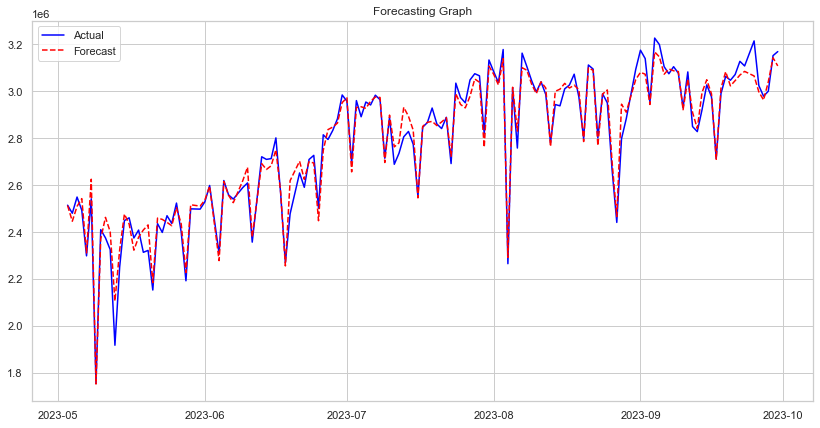

In [444]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Handle missing values. You can use imputation methods, but for simplicity, we'll drop them here.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is now in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)  # Increased iterations for convergence
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Model Selection
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

# Final Model Training
best_model.fit(X, y)

# Use the best model for predictions
# Assuming your future data is the same as X_test for demonstration purposes.
predictions = best_model.predict(X_test)

# Store predictions in a variable
forecasted_values = predictions

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue')
plt.plot(y_test.index, forecasted_values, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph')
plt.legend()
plt.show()


Best Model: Gradient Boosting


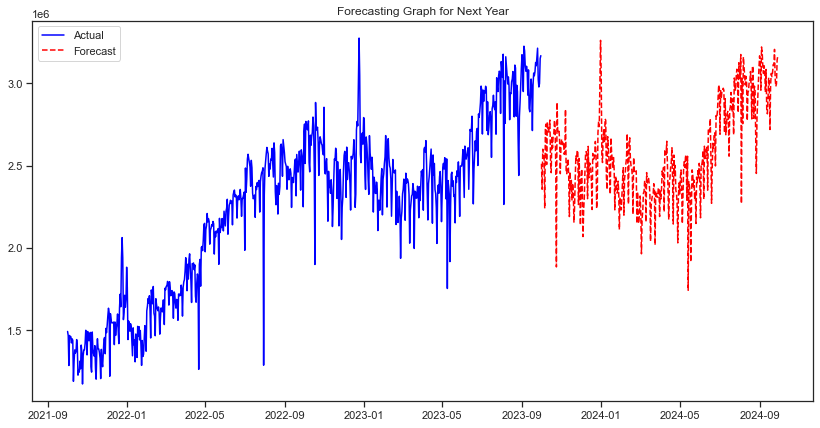

In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Neural Network": MLPRegressor(max_iter=2000)  # Increased iterations for potential convergence
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Model Selection
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-365:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=365)
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()


Model: Linear Regression
MAE: 110165.7971
MSE: 16556466778.4438
RMSE: 128671.9347
------------------------------
Model: Decision Tree
MAE: 81263.8966
MSE: 11135831646.9034
RMSE: 105526.4500
------------------------------
Model: Random Forest
MAE: 73766.1086
MSE: 9691081386.4701
RMSE: 98443.2902
------------------------------
Model: Gradient Boosting
MAE: 54449.7444
MSE: 5762850869.8005
RMSE: 75913.4433
------------------------------
Model: Neural Network
MAE: 87282.1016
MSE: 13079091200.8163
RMSE: 114363.8544
------------------------------

Best Model based on RMSE: Gradient Boosting



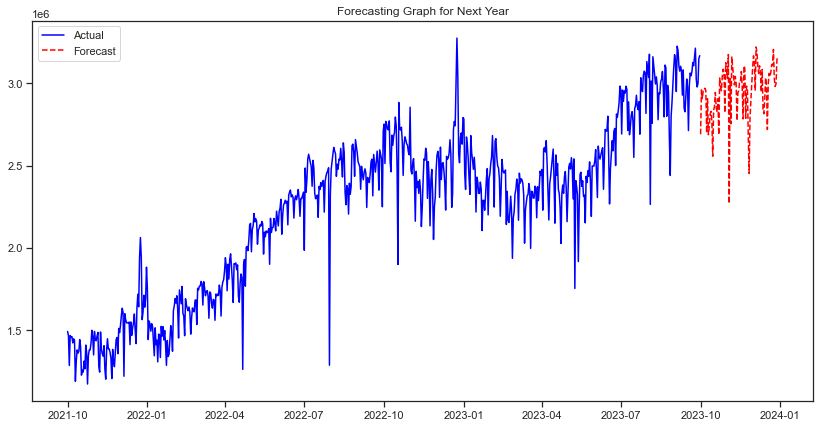

In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Neural Network": MLPRegressor(max_iter=2000)  # Increased iterations for potential convergence
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Display evaluation metrics for each model
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print("-" * 30)

# Model Selection
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]
print(f"\nBest Model based on RMSE: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-90:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=90)
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()


In [332]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate some example data
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train an MLP regressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(5, 5), max_iter=1000, random_state=42)
mlp_regressor.fit(X_train, y_train)

# Make predictions
y_pred = mlp_regressor.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 263.9410847533582


C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



In [248]:
## Get the coefficients for each layer
#for i, coef in enumerate(best_model.coefs_):
#    print(f"Layer {i} weights shape: {coef.shape}")
#    print(f"Layer {i} weights:")
#    print(coef)
#    print(f"Layer {i} biases shape: {best_model.intercepts_[i].shape}")
#    print(f"Layer {i} biases:")
#    print(best_model.intercepts_[i])
#

Model: Linear Regression
MAE: 110165.7971
MSE: 16556466778.4438
RMSE: 128671.9347
------------------------------
Model: Decision Tree
MAE: 91492.6345
MSE: 15159713482.2069
RMSE: 123124.7883
------------------------------
Model: Random Forest
MAE: 70749.7237
MSE: 9138366368.7746
RMSE: 95594.8030
------------------------------
Model: Gradient Boosting
MAE: 54230.9549
MSE: 5718663551.4514
RMSE: 75621.8457
------------------------------
Model: Neural Network
MAE: 90990.8305
MSE: 13402343011.2706
RMSE: 115768.4889
------------------------------

Best Model based on RMSE: Gradient Boosting



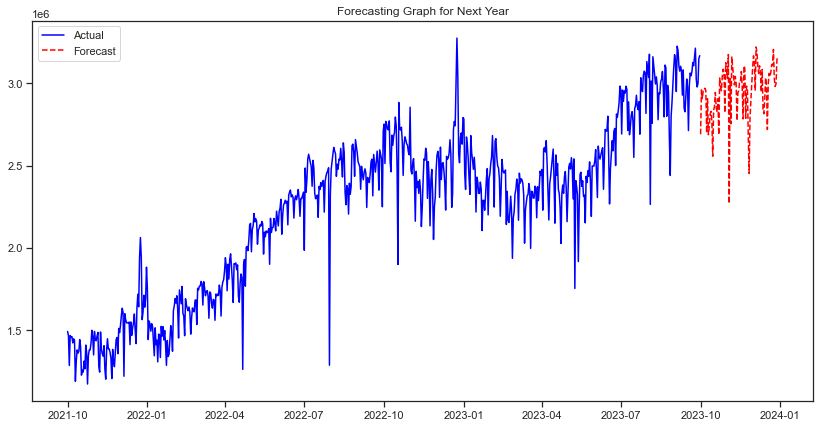

In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Neural Network": MLPRegressor(max_iter=2000)  # Increased iterations for potential convergence
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Display evaluation metrics for each model
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print("-" * 30)

# Model Selection
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]
print(f"\nBest Model based on RMSE: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-90:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Creating a DataFrame for the predictions
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=90)
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Predicted_Usage_Mins': next_year_predictions
})

# Saving the predictions to an Excel file
forecast_df.to_excel("next_year_forecast_v2.xlsx", index=False)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()


Model: Linear Regression
MAE: 110165.7971
MSE: 16556466778.4438
RMSE: 128671.9347
------------------------------
Model: Decision Tree
MAE: 95621.7655
MSE: 15869462795.9862
RMSE: 125974.0560
------------------------------
Model: Random Forest
MAE: 71928.0268
MSE: 9311295028.0662
RMSE: 96495.0518
------------------------------
Model: Gradient Boosting
MAE: 50113.0893
MSE: 4777840733.1186
RMSE: 69121.9266
------------------------------
Model: Neural Network
MAE: 81417.9826
MSE: 14712405601.3948
RMSE: 121294.7056
------------------------------

Best Model based on RMSE: Gradient Boosting



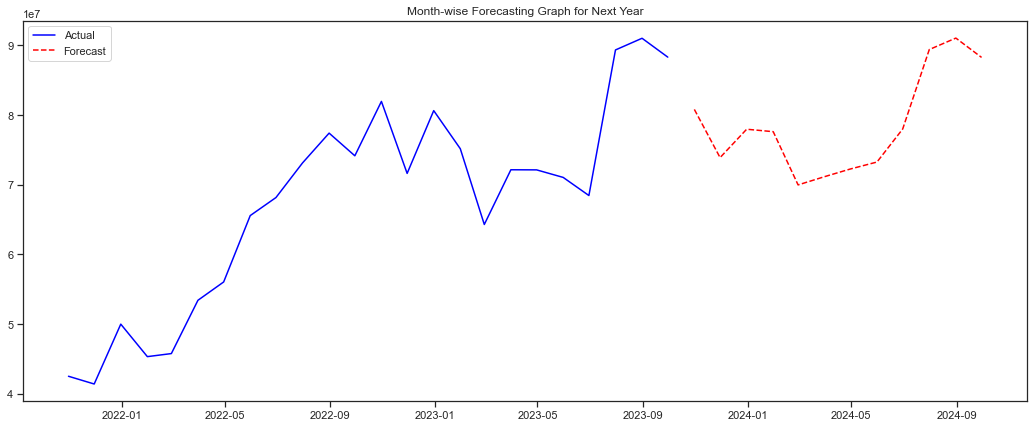

In [334]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Neural Network": MLPRegressor(max_iter=2000)  # Increased iterations for potential convergence
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Display evaluation metrics for each model
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print("-" * 30)

# Model Selection
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]
print(f"\nBest Model based on RMSE: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-365:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Creating a DataFrame for the predictions
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=365)
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Predicted_Usage_Mins': next_year_predictions
})

# Resampling the predictions to month-wise and summing the values for each month
monthwise_forecast = forecast_df.resample('M', on='Date').sum()

# Saving the month-wise predictions to an Excel file
#monthwise_forecast.to_excel("monthwise_forecast.xlsx")

# Plotting the forecasting graph
plt.figure(figsize=(18, 7))
plt.plot(y.resample('M').sum().index, y.resample('M').sum().values, label='Actual', color='blue')
plt.plot(monthwise_forecast.index, monthwise_forecast['Predicted_Usage_Mins'].values, label='Forecast', color='red', linestyle='--')
plt.title('Month-wise Forecasting Graph for Next Year')
plt.legend()
plt.show()


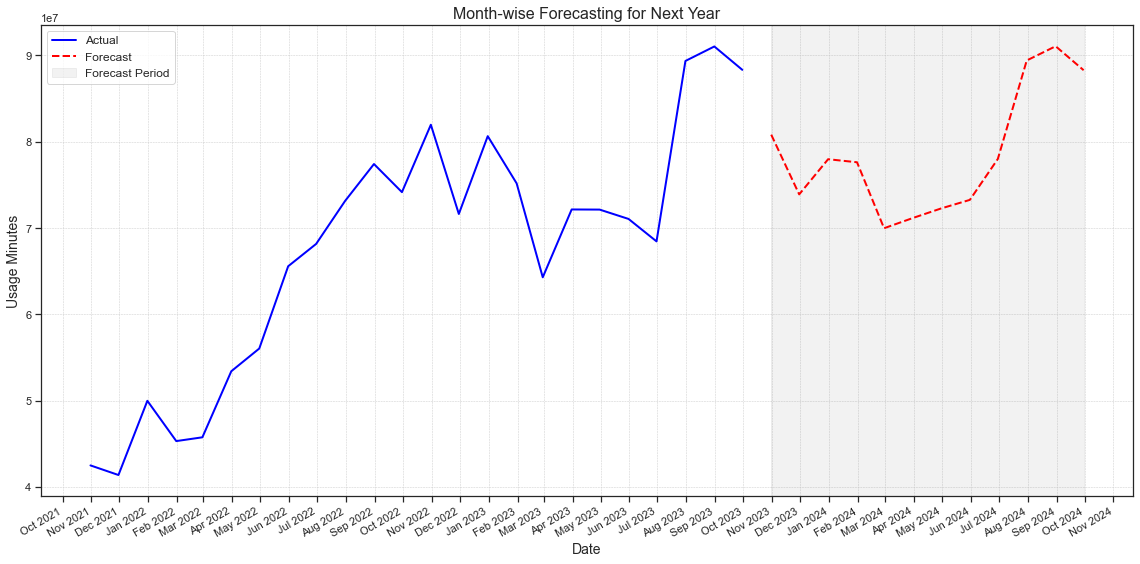

In [335]:
import matplotlib.dates as mdates

# Plotting the forecasting graph with enhanced visuals
plt.figure(figsize=(16, 8))

# Plot actual data
plt.plot(y.resample('M').sum().index, y.resample('M').sum().values, label='Actual', color='blue', linewidth=2)

# Plot forecasted data
forecast_start = monthwise_forecast.index[0]
forecast_end = monthwise_forecast.index[-1]
plt.plot(monthwise_forecast.index, monthwise_forecast['Predicted_Usage_Mins'].values, label='Forecast', color='red', linestyle='--', linewidth=2)

# Shaded region for forecast
plt.axvspan(forecast_start, forecast_end, color='grey', alpha=0.1, label='Forecast Period')

# Enhance x-axis to show month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

# Grid, title, and labels
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Month-wise Forecasting for Next Year', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Usage Minutes', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()

plt.show()


## second cut#########################################################################3

Best Model: Gradient Boosting


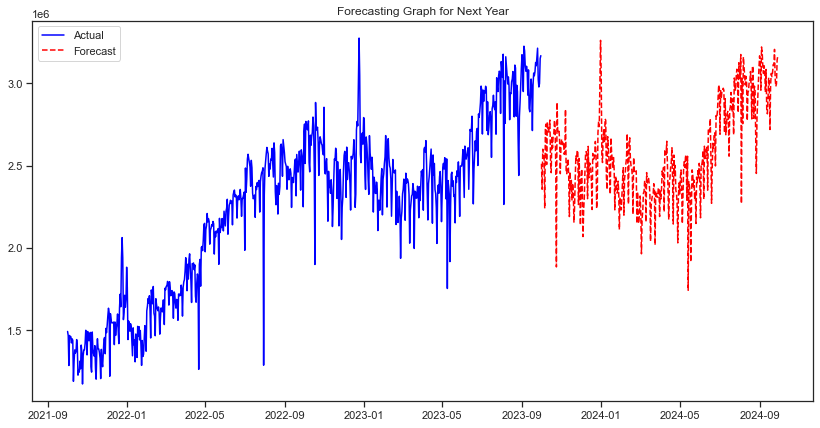

In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Model Selection
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-365:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=365)
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()


Model: Linear Regression
MAE: 110165.7971
MSE: 16556466778.4438
RMSE: 128671.9347
------------------------------
Model: Decision Tree
MAE: 83526.6897
MSE: 11537197649.5448
RMSE: 107411.3479
------------------------------
Model: Random Forest
MAE: 65212.4218
MSE: 7807100894.1923
RMSE: 88357.8004
------------------------------
Model: Gradient Boosting
MAE: 51187.6374
MSE: 5050614085.5773
RMSE: 71067.6726
------------------------------

Best Model based on RMSE: Gradient Boosting



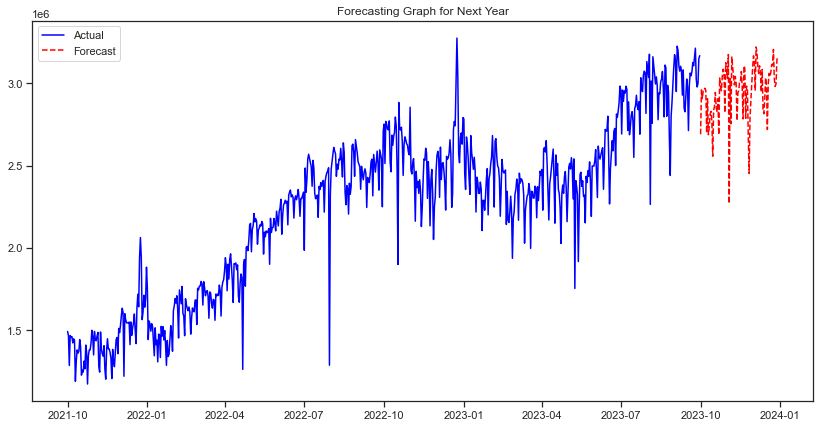

In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()}

for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Display evaluation metrics for each model
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print("-" * 30)

# Model Selection
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]
print(f"\nBest Model based on RMSE: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-90:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=90)
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()


<AxesSubplot:>

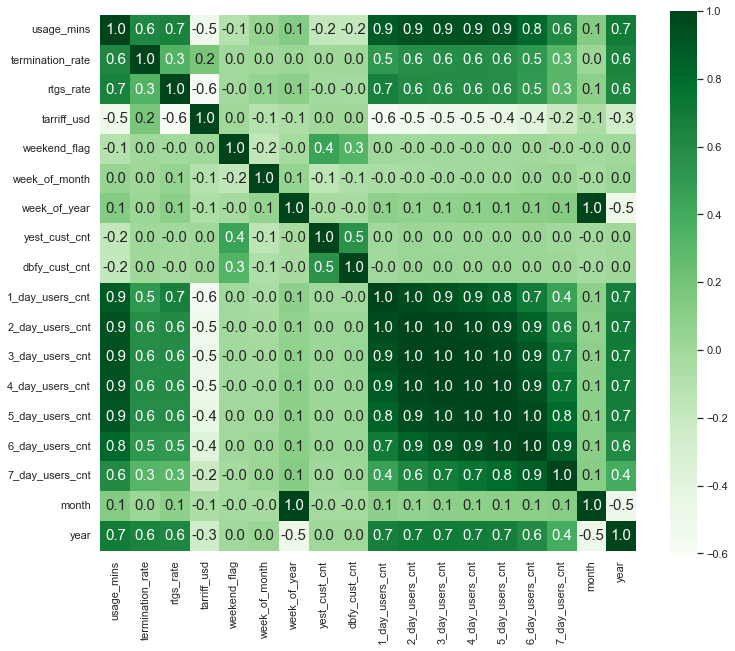

In [445]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape
# Plotting the heatmap of correlation between features
plt.figure(figsize=(12,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

    Usage Minutes (usage_mins) have a strong positive correlation with Unique Customer Count (unq_cust_cnt) and Usage Minutes Mean (usage_mins_mean), with correlation coefficients of 0.98 and 0.97, respectively. This suggests that as usage minutes increase, the number of unique customers and usage minutes mean also tends to increase.

    Termination Rate has a moderately positive correlation with Usage Minutes, with a correlation coefficient of 0.62. This indicates that there is a positive relationship between termination rate and usage minutes.

    Weekend Flag has a slight negative correlation with several variables, including Usage Minutes, Termination Rate, and Unique Customer Count, with correlation coefficients ranging from -0.10 to -0.09. This suggests that the presence of a weekend flag is associated with lower values for these variables.

    Year has a strong positive correlation with Month, with a correlation coefficient of 0.70. This is expected, as the year and month are related, and an increase in year typically corresponds to an increase in month.

    The various user counts (1_day_users_cnt, 2_day_users_cnt, etc.) have strong positive correlations with each other, with correlation coefficients close to 1.00. This implies that these variables are highly interrelated and tend to move together.

    Tarriff USD has a negative correlation with most other variables, particularly Usage Minutes, Termination Rate, and Unique Customer Count, with correlation coefficients ranging from -0.50 to -0.47. This indicates that as tarriff USD increases, these other variables tend to decrease.

    Week of the Year has a strong positive correlation with Week of the Month, with a correlation coefficient of 0.63. This is expected, as the week of the year is related to the week of the month.

    There is a negative correlation between Year and DBFY Customer Count, Yest Customer Count, and 1 Day Users Count, with correlation coefficients around -0.26 to -0.23. This suggests that as the year increases, these variables tend to decrease.

    The correlations between other variables are generally moderate and can be interpreted based on the values provided. Positive values indicate a positive relationship, while negative values indicate a negative relationship.

In [339]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

# Create a tabular format DataFrame
tabular_corr = corr.copy()

# Format the DataFrame for tabular display
tabular_corr = tabular_corr.applymap(lambda x: f"{x:.2f}")

# Display the tabular format
tabular_corr.style


,usage_mins,termination_rate,rtgs_rate,tarriff_usd,weekend_flag,week_of_month,week_of_year,unq_cust_cnt,usage_mins_mean,yest_cust_cnt,dbfy_cust_cnt,1_day_users_cnt,2_day_users_cnt,3_day_users_cnt,4_day_users_cnt,5_day_users_cnt,6_day_users_cnt,7_day_users_cnt,month,year
usage_mins,1.00,0.62,0.65,-0.51,-0.10,0.04,0.13,0.98,0.97,-0.17,-0.19,0.88,0.93,0.93,0.93,0.91,0.82,0.60,0.12,0.70
termination_rate,0.62,1.00,0.33,0.17,0.00,0.00,0.02,0.58,0.65,0.00,0.01,0.51,0.58,0.59,0.59,0.58,0.51,0.31,0.02,0.65
rtgs_rate,0.65,0.33,1.00,-0.60,-0.00,0.05,0.10,0.63,0.58,-0.01,-0.01,0.67,0.61,0.59,0.59,0.58,0.50,0.30,0.09,0.62
tarriff_usd,-0.51,0.17,-0.60,1.00,0.00,-0.10,-0.06,-0.50,-0.47,0.01,0.01,-0.57,-0.51,-0.50,-0.48,-0.45,-0.37,-0.23,-0.06,-0.26
weekend_flag,-0.10,0.00,-0.00,0.00,1.00,-0.16,-0.02,-0.10,-0.09,0.44,0.33,0.00,-0.00,-0.01,-0.00,0.00,0.00,-0.02,-0.01,0.00
week_of_month,0.04,0.00,0.05,-0.10,-0.16,1.00,0.05,0.00,0.09,-0.15,-0.07,-0.05,-0.03,-0.02,-0.01,0.00,0.02,0.02,-0.03,0.03
week_of_year,0.13,0.02,0.10,-0.06,-0.02,0.05,1.00,0.09,0.13,-0.03,-0.03,0.08,0.07,0.08,0.09,0.10,0.10,0.12,1.00,-0.49
unq_cust_cnt,0.98,0.58,0.63,-0.50,-0.10,0.00,0.09,1.00,0.90,-0.23,-0.26,0.88,0.92,0.92,0.91,0.89,0.79,0.58,0.09,0.70
usage_mins_mean,0.97,0.65,0.58,-0.47,-0.09,0.09,0.13,0.90,1.00,-0.08,-0.08,0.83,0.89,0.91,0.91,0.90,0.81,0.60,0.12,0.69
yest_cust_cnt,-0.17,0.00,-0.01,0.01,0.44,-0.15,-0.03,-0.23,-0.08,1.00,0.55,0.00,0.02,0.02,0.02,0.02,0.02,0.00,-0.02,0.01


Model: Linear Regression
MAE: 110165.7971
MSE: 16556466778.4438
RMSE: 128671.9347
------------------------------
Model: Decision Tree
MAE: 96494.1862
MSE: 16443165025.9931
RMSE: 128230.9051
------------------------------
Model: Random Forest
MAE: 79800.1975
MSE: 11328243122.0217
RMSE: 106434.2197
------------------------------
Model: Gradient Boosting
MAE: 50570.7943
MSE: 4896259553.8949
RMSE: 69973.2774
------------------------------

Best Model based on RMSE: Gradient Boosting



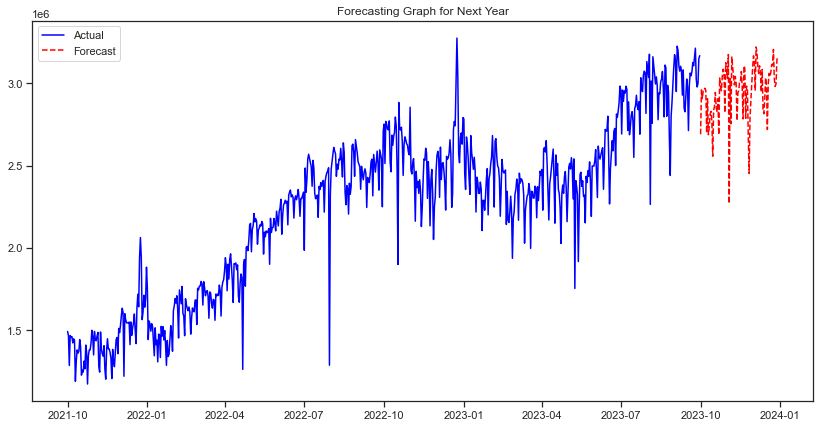

Top 10 Most Important Features:
            Feature  Importance
7   usage_mins_mean    0.683124
6      unq_cust_cnt    0.167022
1         rtgs_rate    0.146334
16  7_day_users_cnt    0.000562
8     yest_cust_cnt    0.000395
9     dbfy_cust_cnt    0.000372
14  5_day_users_cnt    0.000317
5      week_of_year    0.000247
10  1_day_users_cnt    0.000247
15  6_day_users_cnt    0.000239


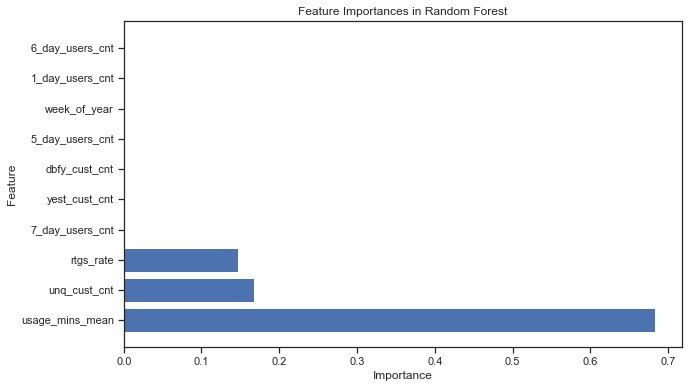

In [340]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor()}

for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Display evaluation metrics for each model
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print("-" * 30)

# Model Selection
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]
print(f"\nBest Model based on RMSE: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-90:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=90)
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()

# Get feature importances for the Random Forest model
random_forest_model = models["Random Forest"]
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features
top_n = 10  # You can change this number to display more or fewer features
print(f"Top {top_n} Most Important Features:")
print(importance_df.head(top_n))

# You can also visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest')
plt.show()


Model: Linear Regression
MAE: 110165.7971
MSE: 16556466778.4438
RMSE: 128671.9347
------------------------------
Model: Decision Tree
MAE: 90558.6276
MSE: 14460702390.7655
RMSE: 120252.6606
------------------------------
Model: Random Forest
MAE: 74832.2705
MSE: 10030999116.1795
RMSE: 100154.8756
------------------------------
Model: Gradient Boosting
MAE: 52800.0441
MSE: 5420528011.5292
RMSE: 73624.2352
------------------------------
Model: XGBoost
MAE: 54883.2716
MSE: 5524936823.6833
RMSE: 74329.9188
------------------------------
Model: SVM Regressor
MAE: 547657.5197
MSE: 370095351365.5109
RMSE: 608354.6263
------------------------------

Best Model based on RMSE: Gradient Boosting



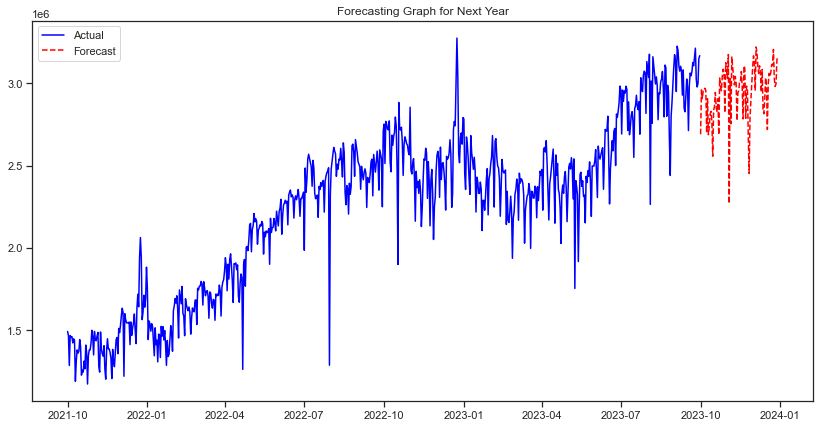

Top 10 Most Important Features:
            Feature  Importance
7   usage_mins_mean    0.684193
6      unq_cust_cnt    0.156757
1         rtgs_rate    0.122678
12  3_day_users_cnt    0.032414
16  7_day_users_cnt    0.000867
9     dbfy_cust_cnt    0.000448
8     yest_cust_cnt    0.000387
5      week_of_year    0.000361
15  6_day_users_cnt    0.000355
14  5_day_users_cnt    0.000333


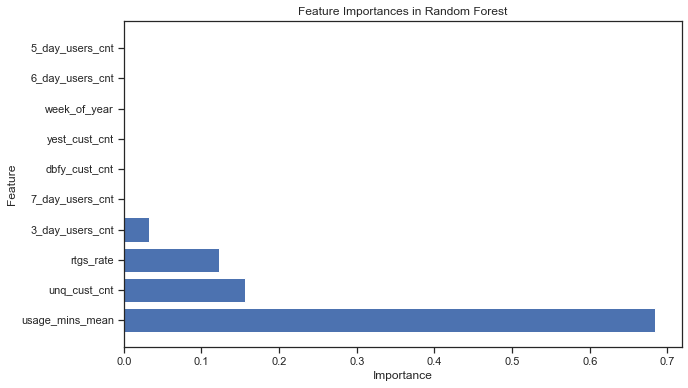

In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVM Regressor": SVR()
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Display evaluation metrics for each model
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print("-" * 30)

# Model Selection
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]
print(f"\nBest Model based on RMSE: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-90:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=90)
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()

# Get feature importances for the Random Forest model
random_forest_model = models["Random Forest"]
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features
top_n = 10  # You can change this number to display more or fewer features
print(f"Top {top_n} Most Important Features:")
print(importance_df.head(top_n))

# You can also visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest')
plt.show()


               Model  R-squared Score
3  Gradient Boosting         0.942435
4            XGBoost         0.934785
2      Random Forest         0.882064
0  Linear Regression         0.804571
1      Decision Tree         0.800853
5      SVM Regressor        -3.368537

Best Model based on R-squared Score: Gradient Boosting



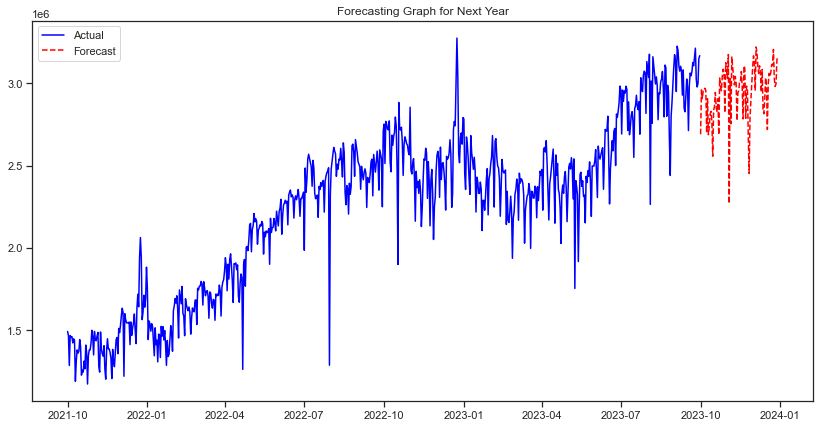

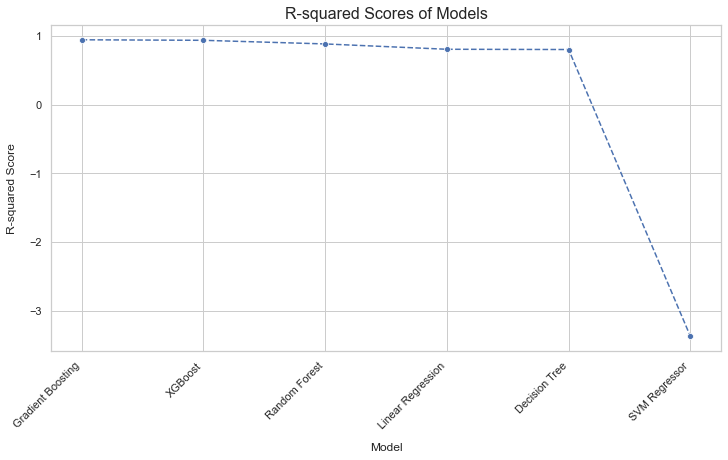

In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVM Regressor": SVR()
}

# Dictionary to store R-squared scores
r_squared_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r_squared_scores[name] = r2

# Create a DataFrame with model names and R-squared scores
models_df = pd.DataFrame({
    'Model': list(r_squared_scores.keys()),
    'R-squared Score': list(r_squared_scores.values())
})

# Sort the DataFrame by R-squared score in descending order
models_df = models_df.sort_values(by='R-squared Score', ascending=False)

# Print the sorted DataFrame
print(models_df)

# Model Selection
best_model_name = models_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest Model based on R-squared Score: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-90:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=90)
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()

# Get feature importances for the Random Forest model
if best_model_name == "Random Forest":
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display the top N most important features
    top_n = 10  # You can change this number to display more or fewer features
    print(f"Top {top_n} Most Important Features:")
    print(importance_df.head(top_n))

    # You can also visualize the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances in Random Forest')
    plt.show()
    
    # Plot the predictions for each model
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

model_names = list(models_df['Model'])
scores = list(models_df['R-squared Score'])

ax = sns.lineplot(x=model_names, y=scores, marker="o", linestyle='--')
ax.set_xlabel('Model', fontsize=12, labelpad=12)
ax.set_ylabel('R-squared Score', fontsize=12, labelpad=12)
ax.set_title('R-squared Scores of Models', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=11)

plt.show()
    
    


               Model  Adjusted R-squared Score
3  Gradient Boosting                  0.934122
4            XGBoost                  0.924872
2      Random Forest                  0.856330
1      Decision Tree                  0.775224
0  Linear Regression                  0.774865
5      SVM Regressor                 -4.032555

Best Model based on Adjusted R-squared Score: Gradient Boosting



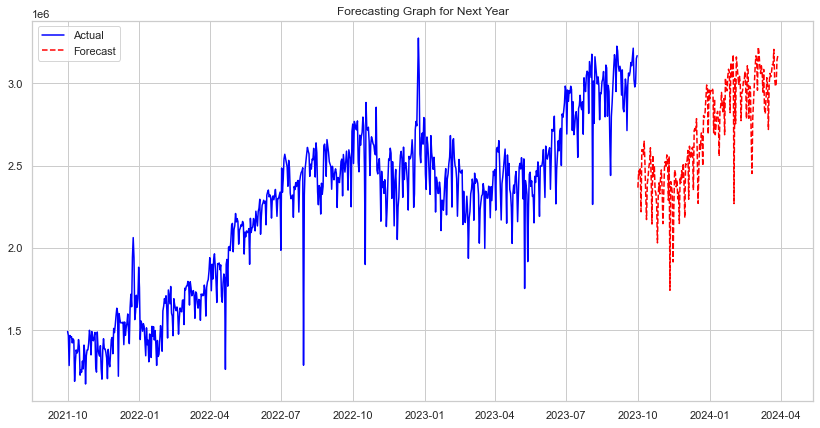

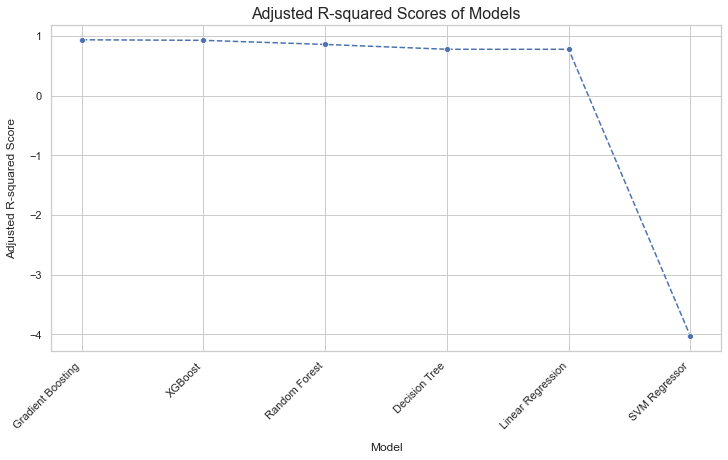

In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVM Regressor": SVR()
}

# Dictionary to store adjusted R-squared scores
adj_r_squared_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate the number of predictors (features)
    num_predictors = X_train.shape[1]
    
    # Calculate the adjusted R-squared value
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - num_predictors - 1)
    adj_r_squared_scores[name] = adj_r2

# Create a DataFrame with model names and adjusted R-squared scores
models_df = pd.DataFrame({
    'Model': list(adj_r_squared_scores.keys()),
    'Adjusted R-squared Score': list(adj_r_squared_scores.values())
})

# Sort the DataFrame by adjusted R-squared score in descending order
models_df = models_df.sort_values(by='Adjusted R-squared Score', ascending=False)

# Print the sorted DataFrame
print(models_df)

# Model Selection
best_model_name = models_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest Model based on Adjusted R-squared Score: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-180:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=180)
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()

# Get feature importances for the Random Forest model
if best_model_name == "Random Forest":
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display the top N most important features
    top_n = 10  # You can change this number to display more or fewer features
    print(f"Top {top_n} Most Important Features:")
    print(importance_df.head(top_n))

    # You can also visualize the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances in Random Forest')
    plt.show()
    
    # Plot the adjusted R-squared values for each model
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

model_names = list(models_df['Model'])
adj_scores = list(models_df['Adjusted R-squared Score'])

ax = sns.lineplot(x=model_names, y=adj_scores, marker="o", linestyle='--')
ax.set_xlabel('Model', fontsize=12, labelpad=12)
ax.set_ylabel('Adjusted R-squared Score', fontsize=12, labelpad=12)
ax.set_title('Adjusted R-squared Scores of Models', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=11)

plt.show()


# final analysis

# excel econet to netone

In [344]:
data.dtypes

usage_mins            int64
termination_rate    float64
rtgs_rate             int64
tarriff_usd         float64
weekend_flag          int64
week_of_month         int64
week_of_year          int64
unq_cust_cnt          int64
usage_mins_mean     float64
yest_cust_cnt         int64
dbfy_cust_cnt         int64
1_day_users_cnt       int64
2_day_users_cnt       int64
3_day_users_cnt       int64
4_day_users_cnt       int64
5_day_users_cnt       int64
6_day_users_cnt       int64
7_day_users_cnt       int64
month                 int64
year                  int64
dtype: object

               Model  Adjusted R-squared Score
3  Gradient Boosting                  0.932746
4            XGBoost                  0.924872
2      Random Forest                  0.874540
1      Decision Tree                  0.803319
0  Linear Regression                  0.774865
5      SVM Regressor                 -4.032555

Best Model based on Adjusted R-squared Score: Gradient Boosting



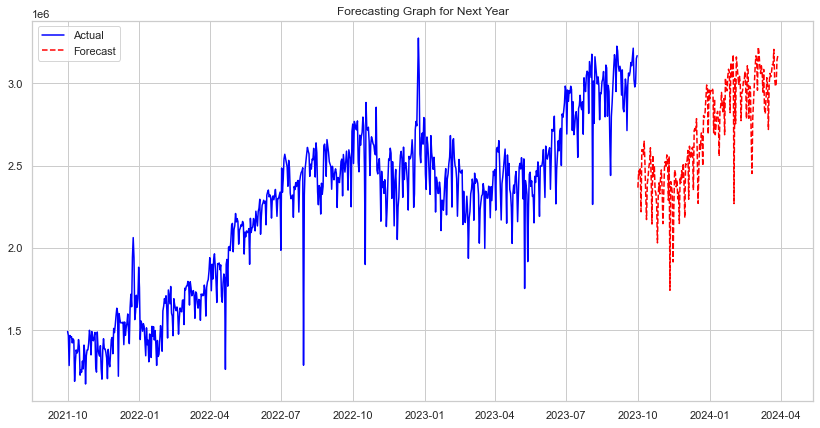

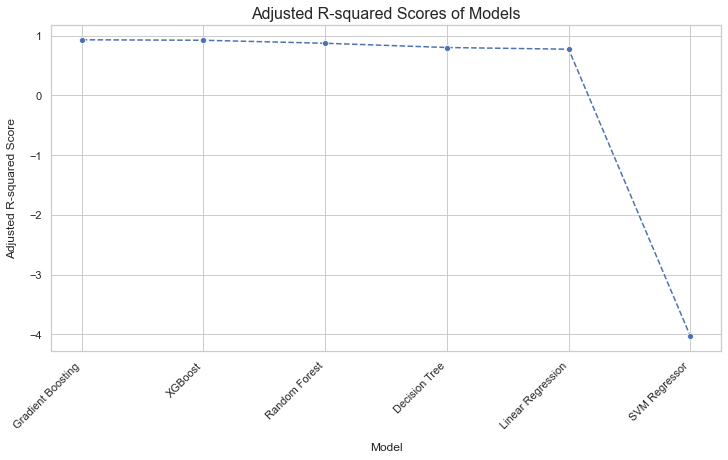

In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVM Regressor": SVR()
}

# Dictionary to store adjusted R-squared scores
adj_r_squared_scores = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate the number of predictors (features)
    num_predictors = X_train.shape[1]
    
    # Calculate the adjusted R-squared value
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - num_predictors - 1)
    adj_r_squared_scores[name] = adj_r2
    
    # Store predictions in the 'predictions' dictionary
    predictions[name] = model.predict(X_test)

# Create a DataFrame with model names and adjusted R-squared scores
models_df = pd.DataFrame({
    'Model': list(adj_r_squared_scores.keys()),
    'Adjusted R-squared Score': list(adj_r_squared_scores.values())
})

# Sort the DataFrame by adjusted R-squared score in descending order
models_df = models_df.sort_values(by='Adjusted R-squared Score', ascending=False)

# Print the sorted DataFrame
print(models_df)

# Model Selection
best_model_name = models_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest Model based on Adjusted R-squared Score: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-180:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Create a DataFrame to store the forecasted values
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=180)
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': next_year_predictions})

# Save the forecasted values to an Excel file
forecast_df.to_excel('forecast_results_ecotonet_v111.xlsx', index=False)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()

# Get feature importances for the Random Forest model
if best_model_name == "Random Forest":
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display the top N most important features
    top_n = 10  # You can change this number to display more or fewer features
    print(f"Top {top_n} Most Important Features:")
    print(importance_df.head(top_n))

    # You can also visualize the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances in Random Forest')
    plt.show()
    
# Plot the adjusted R-squared values for each model
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

model_names = list(models_df['Model'])
adj_scores = list(models_df['Adjusted R-squared Score'])

ax = sns.lineplot(x=model_names, y=adj_scores, marker="o", linestyle='--')
ax.set_xlabel('Model', fontsize=12, labelpad=12)
ax.set_ylabel('Adjusted R-squared Score', fontsize=12, labelpad=12)
ax.set_title('Adjusted R-squared Scores of Models', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=11)

plt.show()

In [346]:
# Get feature importances for the Random Forest model
if best_model_name == "XGBoost":
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display the top N most important features
    top_n = 10  # You can change this number to display more or fewer features
    print(f"Top {top_n} Most Important Features:")
    print(importance_df.head(top_n))

    # You can also visualize the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances in Random Forest')
    plt.show()
    

# econet to netone final code

R-squared Scores:
               Model  R-squared Score
3  Gradient Boosting         0.652719
4            XGBoost         0.513332
2      Random Forest         0.499379
1      Decision Tree         0.043468
0  Linear Regression        -0.540948
5      SVM Regressor        -3.368615

Adjusted R-squared Scores:
               Model  Adjusted R-squared Score
3  Gradient Boosting                  0.606233
4            XGBoost                  0.448187
2      Random Forest                  0.432366
1      Decision Tree                 -0.084572
0  Linear Regression                 -0.747216
5      SVM Regressor                 -3.953390

Best Model based on Adjusted R-squared Score: Gradient Boosting



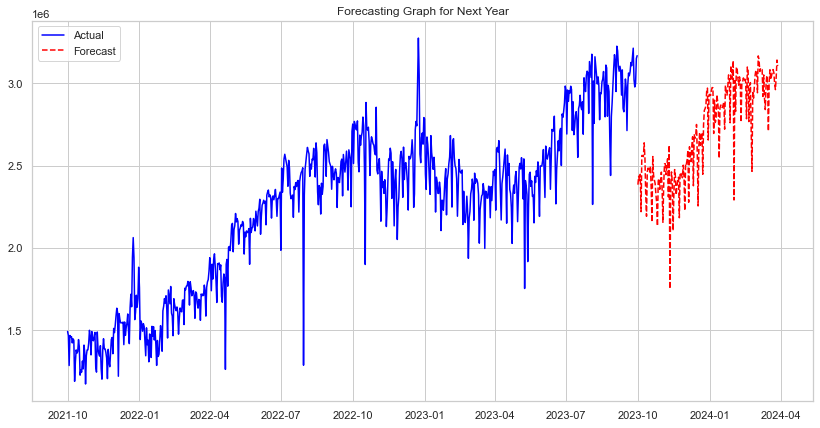

Top 15 Most Important Features:
            Feature  Importance
1         rtgs_rate    0.743989
12  5_day_users_cnt    0.063073
13  6_day_users_cnt    0.049518
7     dbfy_cust_cnt    0.035514
9   2_day_users_cnt    0.026723
11  4_day_users_cnt    0.026469
6     yest_cust_cnt    0.017005
10  3_day_users_cnt    0.013335
14  7_day_users_cnt    0.008547
2       tarriff_usd    0.006066
5      week_of_year    0.005873
8   1_day_users_cnt    0.002292
15            month    0.001202
4     week_of_month    0.000369
3      weekend_flag    0.000019


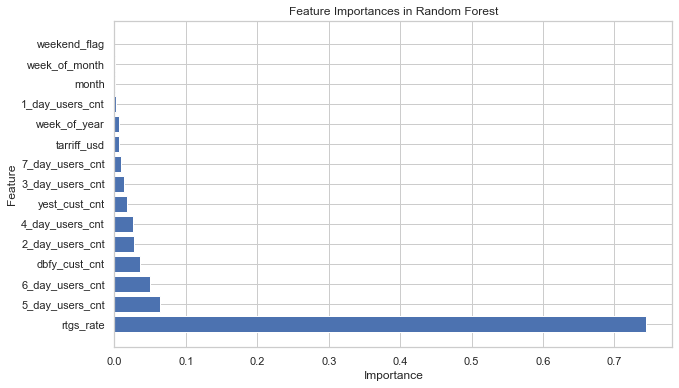

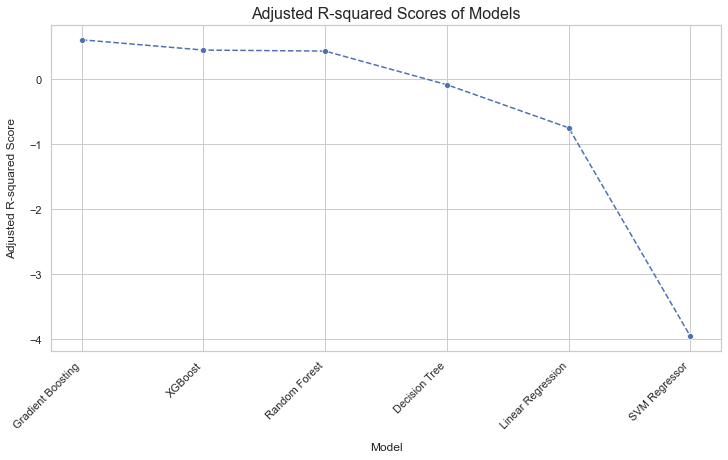

In [446]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVM Regressor": SVR()
}

# Dictionary to store R-squared scores and adjusted R-squared scores
r_squared_scores = {}
adj_r_squared_scores = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate the number of predictors (features)
    num_predictors = X_train.shape[1]
    
    # Calculate the adjusted R-squared value
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - num_predictors - 1)
    r_squared_scores[name] = r2
    adj_r_squared_scores[name] = adj_r2
    
    # Store predictions in the 'predictions' dictionary
    predictions[name] = model.predict(X_test)

# Create DataFrames with model names, R-squared, and adjusted R-squared scores
r_squared_df = pd.DataFrame({
    'Model': list(r_squared_scores.keys()),
    'R-squared Score': list(r_squared_scores.values())
})

adj_r_squared_df = pd.DataFrame({
    'Model': list(adj_r_squared_scores.keys()),
    'Adjusted R-squared Score': list(adj_r_squared_scores.values())
})

# Sort the DataFrames by adjusted R-squared score in descending order
r_squared_df = r_squared_df.sort_values(by='R-squared Score', ascending=False)
adj_r_squared_df = adj_r_squared_df.sort_values(by='Adjusted R-squared Score', ascending=False)

# Print the sorted DataFrames with R-squared and adjusted R-squared scores
print("R-squared Scores:")
print(r_squared_df)
print("\nAdjusted R-squared Scores:")
print(adj_r_squared_df)

# Model Selection
best_model_name = adj_r_squared_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest Model based on Adjusted R-squared Score: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-180:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Create a DataFrame to store the forecasted values
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=180)
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': next_year_predictions})

# Save the forecasted values to an Excel file
#forecast_df.to_excel('forecast_results_ecotonet_v1test.xlsx', index=False)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()

# Get feature importances for the Random Forest model
if best_model_name == "Gradient Boosting":
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display the top N most important features
    top_n = 15  # You can change this number to display more or fewer features
    print(f"Top {top_n} Most Important Features:")
    print(importance_df.head(top_n))

    # You can also visualize the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances in Random Forest')
    plt.show()

# Plot the adjusted R-squared values for each model
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

model_names = list(adj_r_squared_df['Model'])
adj_scores = list(adj_r_squared_df['Adjusted R-squared Score'])

ax = sns.lineplot(x=model_names, y=adj_scores, marker="o", linestyle='--')
ax.set_xlabel('Model', fontsize=12, labelpad=12)
ax.set_ylabel('Adjusted R-squared Score', fontsize=12, labelpad=12)
ax.set_title('Adjusted R-squared Scores of Models', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=11)

plt.show()


In [350]:
# Get feature importances for the Random Forest model
if best_model_name == "Gradient Boosting":
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display the top N most important features
    top_n = 10  # You can change this number to display more or fewer features
    print(f"Top {top_n} Most Important Features:")
    print(importance_df.head(top_n))

Top 10 Most Important Features:
            Feature  Importance
7   usage_mins_mean    0.630114
6      unq_cust_cnt    0.366479
14  5_day_users_cnt    0.002972
11  2_day_users_cnt    0.000114
9     dbfy_cust_cnt    0.000103
8     yest_cust_cnt    0.000059
5      week_of_year    0.000052
1         rtgs_rate    0.000025
10  1_day_users_cnt    0.000020
2       tarriff_usd    0.000018


# net one to econet ###############

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Handle missing values.
datav1 = datav1.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(datav1))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = datav1.drop(columns=['usage_mins'])
y = datav1['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVM Regressor": SVR()
}

# Dictionary to store adjusted R-squared scores
adj_r_squared_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate the number of predictors (features)
    num_predictors = X_train.shape[1]
    
    # Calculate the adjusted R-squared value
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - num_predictors - 1)
    adj_r_squared_scores[name] = adj_r2

# Create a DataFrame with model names and adjusted R-squared scores
models_df = pd.DataFrame({
    'Model': list(adj_r_squared_scores.keys()),
    'Adjusted R-squared Score': list(adj_r_squared_scores.values())
})

# Sort the DataFrame by adjusted R-squared score in descending order
models_df = models_df.sort_values(by='Adjusted R-squared Score', ascending=False)

# Print the sorted DataFrame
print(models_df)

# Model Selection
best_model_name = models_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest Model based on Adjusted R-squared Score: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-180:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=180)
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()

# Get feature importances for the Random Forest model
if best_model_name == "Random Forest":
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display the top N most important features
    top_n = 10  # You can change this number to display more or fewer features
    print(f"Top {top_n} Most Important Features:")
    print(importance_df.head(top_n))

    # You can also visualize the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances in Random Forest')
    plt.show()
    
    # Plot the adjusted R-squared values for each model
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

model_names = list(models_df['Model'])
adj_scores = list(models_df['Adjusted R-squared Score'])

ax = sns.lineplot(x=model_names, y=adj_scores, marker="o", linestyle='--')
ax.set_xlabel('Model', fontsize=12, labelpad=12)
ax.set_ylabel('Adjusted R-squared Score', fontsize=12, labelpad=12)
ax.set_title('Adjusted R-squared Scores of Models', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=11)

plt.show()


In [ ]:
data.head(),datav1.head()

# netone to econet excel

               Model  Adjusted R-squared Score
3  Gradient Boosting                  0.689345
2      Random Forest                  0.659731
1      Decision Tree                  0.608350
4            XGBoost                  0.507187
5      SVM Regressor                 -0.504992
0  Linear Regression                -57.185988

Best Model based on Adjusted R-squared Score: Gradient Boosting



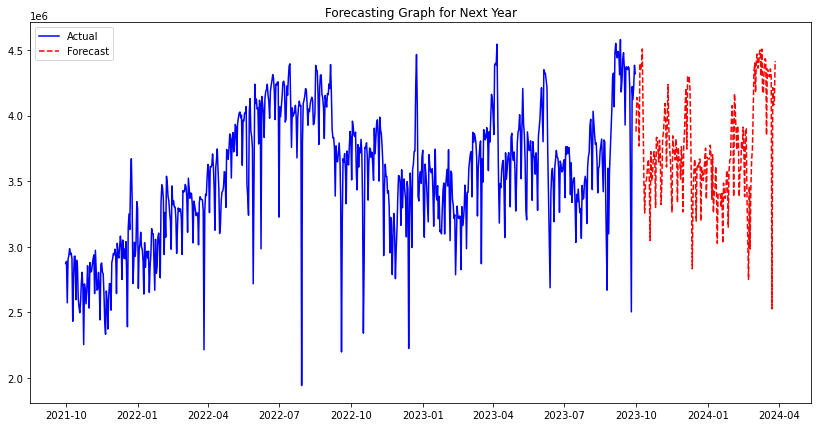

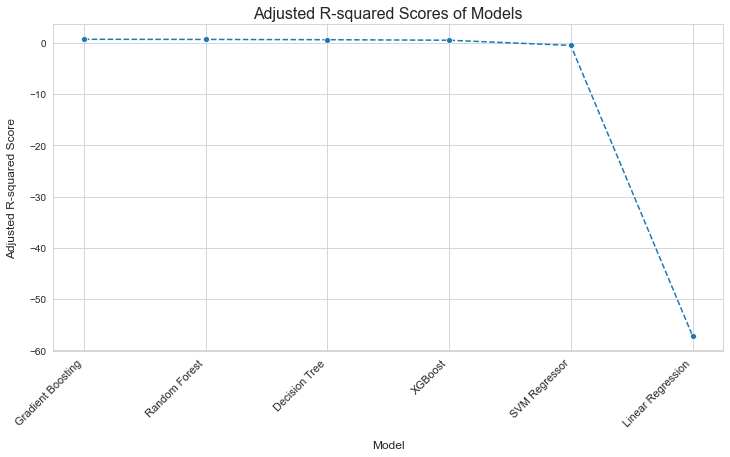

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Handle missing values.
datav1 = datav1.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(datav1))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = datav1.drop(columns=['usage_mins'])
y = datav1['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVM Regressor": SVR()
}

# Dictionary to store adjusted R-squared scores
adj_r_squared_scores = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate the number of predictors (features)
    num_predictors = X_train.shape[1]
    
    # Calculate the adjusted R-squared value
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - num_predictors - 1)
    adj_r_squared_scores[name] = adj_r2
    
    # Store predictions in the 'predictions' dictionary
    predictions[name] = model.predict(X_test)

# Create a DataFrame with model names and adjusted R-squared scores
models_df = pd.DataFrame({
    'Model': list(adj_r_squared_scores.keys()),
    'Adjusted R-squared Score': list(adj_r_squared_scores.values())
})

# Sort the DataFrame by adjusted R-squared score in descending order
models_df = models_df.sort_values(by='Adjusted R-squared Score', ascending=False)

# Print the sorted DataFrame
print(models_df)

# Model Selection
best_model_name = models_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest Model based on Adjusted R-squared Score: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-180:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Create a DataFrame to store the forecasted values
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=180)
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': next_year_predictions})

# Save the forecasted values to an Excel file
forecast_df.to_excel('forecast_results_netonetoeconet_v2.xlsx', index=False)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()

# Get feature importances for the Random Forest model
if best_model_name == "Random Forest":
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display the top N most important features
    top_n = 10  # You can change this number to display more or fewer features
    print(f"Top {top_n} Most Important Features:")
    print(importance_df.head(top_n))

    # You can also visualize the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances in Random Forest')
    plt.show()
    
# Plot the adjusted R-squared values for each model
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

model_names = list(models_df['Model'])
adj_scores = list(models_df['Adjusted R-squared Score'])

ax = sns.lineplot(x=model_names, y=adj_scores, marker="o", linestyle='--')
ax.set_xlabel('Model', fontsize=12, labelpad=12)
ax.set_ylabel('Adjusted R-squared Score', fontsize=12, labelpad=12)
ax.set_title('Adjusted R-squared Scores of Models', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=11)

plt.show()


In [ ]:
scores

# netone to econet data 

In [ ]:
datav1.columns

In [ ]:
X.shape,y.shape

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Handle missing values.
datav1 = datav1.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(datav1))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = datav1.drop(columns=['usage_mins'])
y = datav1['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVM Regressor": SVR()
}

# Dictionary to store adjusted R-squared scores
adj_r_squared_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    n = len(X_test)
    p = X_test.shape[1]
    
    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    
    # Calculate adjusted R-squared
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    
    adj_r_squared_scores[name] = adj_r2

# Create a DataFrame with model names and adjusted R-squared scores
models_df = pd.DataFrame({
    'Model': list(adj_r_squared_scores.keys()),
    'Adjusted R-squared Score': list(adj_r_squared_scores.values())
})

# Sort the DataFrame by adjusted R-squared score in descending order
models_df = models_df.sort_values(by='Adjusted R-squared Score', ascending=False)

# Print the sorted DataFrame
print(models_df)

# Model Selection
best_model_name = models_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest Model based on Adjusted R-squared Score: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-90:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Generate dates for the next year's predictions
forecast_start_date = datav1.index[-1] + pd.Timedelta(days=1)
forecast_end_date = forecast_start_date + pd.DateOffset(days=179)
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(datav1.index, y.values, label='Actual', color='blue')
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()

# Get feature importances for the Random Forest model
if best_model_name == "Random Forest":
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display the top N most important features
    top_n = 10  # You can change this number to display more or fewer features
    print(f"Top {top_n} Most Important Features:")
    print(importance_df.head(top_n))

    # You can also visualize the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances in Random Forest')
    plt.show()


In the list of models and their corresponding R-squared scores, a higher R-squared score indicates a better model fit to the data. Therefore, in our list, "Random Forest" has the highest R-squared score of 0.100980, making it the best-performing model based on the provided R-squared scores.

So, "Random Forest" is the most suitable model from the list you've provided.

In [ ]:
from sklearn.tree import export_text

# Replace 'random_forest_model' with your trained Random Forest model
tree = random_forest_model.estimators_[0]  # Access the first decision tree in the ensemble

# Export the decision tree to text format
tree_text = export_text(tree, feature_names=list(X_train.columns))

# Print the text representation of the decision tree
print(tree_text)


In [ ]:

# Assuming you have already selected the best Random Forest model and it's stored in 'best_model'

# Access the first decision tree in the ensemble
decision_tree = best_model.estimators_[0][0]  # Use [0][0] to access the first decision tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=X_train.columns, class_names=["Usage"], rounded=True)
plt.show()

Certainly! A tree diagram, often referred to as a decision tree, is a visual representation of a machine learning model's decision-making process. Each node (or box) in the tree represents a decision point or a split based on a feature, and the branches represent the possible outcomes or decisions. Here's how to interpret the elements of a decision tree:

    Root Node: The topmost node in the tree is called the root node. It represents the initial decision or the first feature used to split the data. In the diagram, you'll see a rectangular box at the top.

    Internal Nodes: These are nodes within the tree that represent decisions based on specific features. Each internal node has two or more branches, indicating possible paths the data can follow based on the condition of that feature. In the diagram, the internal nodes are also represented as rectangular boxes.

    Leaves (Terminal Nodes): These are the end nodes of the tree where predictions are made. Each leaf node represents a predicted outcome. In a regression tree, the outcome is typically a numerical value. In a classification tree, the outcome is a class label. In the diagram, the leaf nodes are represented as ellipses or circles.

    Edges: The lines connecting nodes represent the flow of data through the decision tree. The direction of the flow is determined by the conditions or rules associated with each internal node.

    Conditions: Each internal node is associated with a condition, which is a rule based on a specific feature. If the condition is true for a data point, it follows one branch; if false, it follows another branch. Conditions can be inequalities, such as "feature value <= threshold."

    Gini Impurity (Classification) or MSE (Regression): Decision trees often display measures of impurity or error at internal nodes. In classification trees, this measure is Gini impurity, while in regression trees, it's Mean Squared Error (MSE). These measures help in determining the quality of the split. Lower impurity or error is preferred when making a decision.

    Number of Samples: At each node, you may see information about the number of samples (data points) that reach that node. It can help you understand how many data points follow each branch.

    Value: For classification trees, you might see the distribution of class labels at a leaf node. For regression trees, you may see the predicted value at a leaf node.

The goal of a decision tree is to make decisions that best separate the data into different classes (for classification) or predict a target value (for regression) accurately. The tree is constructed by recursively splitting the data into subsets based on the features that provide the most information gain or reduction in impurity/error.

The tree diagram is a valuable tool for understanding the logic behind a machine learning model's predictions and for identifying which features are the most important for the model's decision-making process. It provides transparency into how the model is making decisions and is often used for interpretability and model understanding.
Free Research Preview. ChatGPT may produce inaccurate information about people, places, or facts. ChatGPT September 25 Version

Scenario: You are still a bank manager, and you want to decide whether to approve or deny loan applications based on multiple factors. You will use a decision tree to automate this process.

Data: You have a dataset of loan applications with information about the applicant's Credit Score, Income, and Loan Amount. The target variable is still binary: approved (1) or denied (0).

Here's a simplified decision tree:

Certainly, let's expand on the example with multiple features to illustrate how a decision tree considers multiple factors in making a decision. In this case, we'll consider three features: Credit Score, Income, and Loan Amount.

Scenario: You are still a bank manager, and you want to decide whether to approve or deny loan applications based on multiple factors. You will use a decision tree to automate this process.

Data: You have a dataset of loan applications with information about the applicant's Credit Score, Income, and Loan Amount. The target variable is still binary: approved (1) or denied (0).

Here's a simplified decision tree:

scss

                Credit Score <= 700
                /           \
               /             \
          Income <= $50K    Loan Amount <= $10K
         /      \               /       \
        /        \             /         \
  Denied    Approved     Denied    Approved
  (60%)     (40%)        (20%)     (80%)

Let's break down this more complex decision tree:

    Root Node: The first decision is still based on Credit Score. If the applicant's credit score is less than or equal to 700, you follow the left branch; otherwise, you follow the right branch.

    Internal Nodes: In this example, there are three internal nodes, representing decisions based on Credit Score, Income, and Loan Amount.

    Leaves: There are four leaves at the bottom of the tree, each representing a decision based on a combination of features. For example, if the credit score is 700 or lower, income is less than or equal to $50,000, and the loan amount is less than or equal to $10,000, there is an 80% chance the loan will be approved.

    Conditions: The conditions at internal nodes are based on the values of multiple features. For example, the first internal node checks Credit Score <= 700, the second internal node checks Income <= $50,000, and the third internal node checks Loan Amount <= $10,000.

In this more complex decision tree, the model takes into account multiple factors (credit score, income, and loan amount) to make a decision. The conditions at each internal node allow the model to differentiate between different applicant profiles and determine the likelihood of loan approval.

This example demonstrates how decision trees can handle and combine multiple features to make decisions, providing a more nuanced approach to decision-making compared to a single feature. The conditions at each node are learned from the training data to create an effective decision-making process for new, unseen data.

In [ ]:
data.columns

In [ ]:
data.head()

In [ ]:
import hvplot.pandas
datav1.hvplot.hist(by='usage_mins', subplots=False, width=1000)

In [ ]:
data.hvplot.hist("usage_mins")

In [ ]:
data.hvplot.scatter(x='year', y='usage_mins')

In [ ]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
# Create a boxplot using hvplot
boxplot = data.hvplot.box(y='usage_mins', by='year', xlabel='Year', ylabel='Usage Minutes', title='Boxplot of Usage Minutes by Year')

boxplot

In [ ]:
import bokeh
print(bokeh.__version__)


In [ ]:
pip uninstall bokeh


In [ ]:
pip install bokeh==2.3.2


In [ ]:
pip install holoviews==1.14.4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=1200, max_depth=15, min_samples_split=5, min_samples_leaf=5, max_features=None, oob_score=True, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=6000, learning_rate=0.01, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state=42),
    "XGBoost": XGBRegressor(learning_rate=0.01, n_estimators=6000, max_depth=4, min_child_weight=0, gamma=0.6, subsample=0.7, colsample_bytree=0.7, objective='reg:linear', nthread=-1, scale_pos_weight=1, seed=27, reg_alpha=0.00006, random_state=42),
    "SVM Regressor": SVR(C=20, epsilon=0.008, gamma=0.0003)
}

# Dictionary to store R-squared scores
r_squared_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r_squared_scores[name] = r2

# Create a DataFrame with model names and R-squared scores
models_df = pd.DataFrame({
    'Model': list(r_squared_scores.keys()),
    'R-squared Score': list(r_squared_scores.values())
})

# Sort the DataFrame by R-squared score in descending order
models_df = models_df.sort_values(by='R-squared Score', ascending=False)

# Print the sorted DataFrame
print(models_df)

# Model Selection
best_model_name = models_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest Model based on R-squared Score: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-90:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=90)
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()

# Get feature importances for the Random Forest model
if best_model_name == "Random Forest":
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display the top N most important features
    top_n = 10  # You can change this number to display more or fewer features
    print(f"Top {top_n} Most Important Features:")
    print(importance_df.head(top_n))

    # Visualize the feature importances with a bar graph
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances in Random Forest')
    plt.show()

# Plot the predictions for each model
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

model_names = list(models_df['Model'])
scores = list(models_df['R-squared Score'])

ax = sns.lineplot(x=model_names, y=scores, marker="o", linestyle='--')
ax.set_xlabel('Model', fontsize=12, labelpad=12)
ax.set_ylabel('R-squared Score', fontsize=12, labelpad=12)
ax.set_title('R-squared Scores of Models', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=11)

plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVM Regressor": SVR()
}

# Dictionary to store R-squared scores
r_squared_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r_squared_scores[name] = r2

# Create a DataFrame with model names and R-squared scores
models_df = pd.DataFrame({
    'Model': list(r_squared_scores.keys()),
    'R-squared Score': list(r_squared_scores.values())
})

# Sort the DataFrame by R-squared score in descending order
models_df = models_df.sort_values(by='R-squared Score', ascending=False)

# Print the sorted DataFrame
print(models_df)

# Model Selection
best_model_name = models_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest Model based on R-squared Score: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-90:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=90)
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()

# Get feature importances for the Random Forest model
if best_model_name == "Random Forest":
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display the top N most important features
    top_n = 10  # You can change this number to display more or fewer features
    print(f"Top {top_n} Most Important Features:")
    print(importance_df.head(top_n))

    # You can also visualize the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances in Random Forest')

# Plot the predictions for each model
plt.subplot(212)
sns.set_style("whitegrid")

model_names = list(models_df['Model'])
scores = list(models_df['R-squared Score'])

ax = sns.lineplot(x=model_names, y=scores, marker="o", linestyle='--')
ax.set_xlabel('Model', fontsize=12, labelpad=12)
ax.set_ylabel('R-squared Score', fontsize=12, labelpad=12)
ax.set_title('R-squared Scores of Models', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=11)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Handle missing values. You can use imputation methods, but for simplicity, we'll drop them here.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is now in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)  # Increased iterations for convergence
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Model Selection
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

# Final Model Training
best_model.fit(X, y)

# Use the best model for predictions
# Assuming your future data is the same as X_test for demonstration purposes.
predictions = best_model.predict(X_test)

# Store predictions in a variable
forecasted_values = predictions

# Create a quarterly DataFrame for actual and forecasted values
quarterly_data = pd.DataFrame({
    'Actual': y_test,
    'Forecasted': forecasted_values
})

# Print the quarterly data
print(quarterly_data)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue')
plt.plot(y_test.index, forecasted_values, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
data11 = pd.read_csv(r'C:\Users\uddandam.prakash\Downloads\tsa_model_base_v1.csv')
data12=pd.read_excel(r'C:\Users\uddandam.prakash\Downloads\netonetoeconetdatav1.xlsx')
data11.head()

## Cleaning up the data
data11.columns=["Date","no_of_calls","usage_mins","tarriff_rate","termination_rate","rtgs_rate"]
data12.columns=["Date","no_of_calls","usage_mins","tarriff_rate","termination_rate","rtgs_rate"]
data11.head()
data12.head()



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Handle missing values. You can use imputation methods, but for simplicity, we'll drop them here.
data11 = data11.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data11))

# Assuming your data is now in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)  # Increased iterations for convergence
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Model Selection
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

# Final Model Training
best_model.fit(X, y)

# Use the best model for predictions
# Assuming your future data is the same as X_test for demonstration purposes.
predictions = best_model.predict(X_test)

# Store predictions in a variable
forecasted_values = predictions

# Create a quarterly DataFrame for actual and forecasted values
quarterly_data = pd.DataFrame({
    'Actual': y_test,
    'Forecasted': forecasted_values
})

# Print the quarterly data
print(quarterly_data)

# Save the quarterly data to an Excel file
quarterly_data.to_excel('quarterly_forecast_results.xlsx', index=False)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue')
plt.plot(y_test.index, forecasted_values, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph')
plt.legend()
plt.show()
